In [1]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt, seaborn as sns
import matplotlib.style as style
%matplotlib inline
import itertools

import warnings
warnings.filterwarnings('ignore')

In [2]:
pd.set_option('display.max_columns', 122)
pd.set_option('display.max_rows', 100)

In [3]:
# reading application_data.csv file

application_data=pd.read_csv(r'H:\Data Science\EDA case study\input files\application_data.csv')
application_data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [4]:
# reading previous_application.csv file 

previous_application=pd.read_csv(r'H:\Data Science\EDA case study\input files\previous_application.csv')
previous_application.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,Y,1,0.0,0.182832,0.867336,XAP,Approved,-73,Cash through the bank,XAP,NaN,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-164,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-301,Cash through the bank,XAP,"Spouse, partner",Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,Y,1,NaN,NaN,NaN,XNA,Approved,-512,Cash through the bank,XAP,NaN,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,Y,1,NaN,NaN,NaN,Repairs,Refused,-781,Cash through the bank,HC,NaN,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
# reading columns_description.csv file

#columns_description = pd.read_csv(r'H:\Data Science\EDA case study\input files\columns_description.csv')

- Summary information of data structure

In [5]:
application_data.shape

(307511, 122)

In [6]:
application_data.size

37516342

In [7]:
application_data.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
 #   Column                        Dtype  
---  ------                        -----  
 0   SK_ID_CURR                    int64  
 1   TARGET                        int64  
 2   NAME_CONTRACT_TYPE            object 
 3   CODE_GENDER                   object 
 4   FLAG_OWN_CAR                  object 
 5   FLAG_OWN_REALTY               object 
 6   CNT_CHILDREN                  int64  
 7   AMT_INCOME_TOTAL              float64
 8   AMT_CREDIT                    float64
 9   AMT_ANNUITY                   float64
 10  AMT_GOODS_PRICE               float64
 11  NAME_TYPE_SUITE               object 
 12  NAME_INCOME_TYPE              object 
 13  NAME_EDUCATION_TYPE           object 
 14  NAME_FAMILY_STATUS            object 
 15  NAME_HOUSING_TYPE             object 
 16  REGION_POPULATION_RELATIVE    float64
 17  DAYS_BIRTH                    int64  
 18  DAYS_EMPLOYED          

In [8]:
application_data.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,104582.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307509.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,134133.000000,3.068510e+05,246546.000000,151450.00000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,159080.000000,306490.000000,306490.000000,306490.000000,306490.000000,307510.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.00000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,-4986.120328,-2994.202373,12.061091,0.999997,0.819889,0.199368,0.998133,0.281066,0.056720,2.152665,2.052463,2.031521,12.063419,0.015144,0.050769,0.040659,0.078173,0.230454,0.179555,0.502130,5.143927e-01,0.510853,0.11744,0.088442,0.977735,0.752471,0.044621,0.078942,0.149725,0.226282,0.231894,0.066333,0.100775,0.107399,0.008809,0.028358,0.114231,0.087543,0.977065,0.759637,0.042553,0.074490,0.145193,0.222315,0.228058,0.064958,0.105645,0.105975,0.008076,0.027022,0.117850,0.087955,0.97

In [9]:
previous_application.shape

(1670214, 37)

In [10]:
previous_application.size

61797918

In [11]:
previous_application.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

In [12]:
previous_application.describe()

,SK_ID_PREV,SK_ID_CURR,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,HOUR_APPR_PROCESS_START,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,DAYS_DECISION,SELLERPLACE_AREA,CNT_PAYMENT,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
count,1.670214e+06,1.670214e+06,1.297979e+06,1.670214e+06,1.670213e+06,7.743700e+05,1.284699e+06,1.670214e+06,1.670214e+06,774370.000000,5951.000000,5951.000000,1.670214e+06,1.670214e+06,1.297984e+06,997149.000000,997149.000000,997149.000000,997149.000000,997149.000000,997149.000000
mean,1.923089e+06,2.783572e+05,1.595512e+04,1.752339e+05,1.961140e+05,6.697402e+03,2.278473e+05,1.248418e+01,9.964675e-01,0.079637,0.188357,0.773503,-8.806797e+02,3.139511e+02,1.605408e+01,342209.855039,13826.269337,33767.774054,76582.403064,81992.343838,0.332570
std,5.325980e+05,1.028148e+05,1.478214e+04,2.927798e+05,3.185746e+05,2.092150e+04,3.153966e+05,3.334028e+00,5.932963e-02,0.107823,0.087671,0.100879,7.790997e+02,7.127443e+03,1.456729e+01,88916.115834,72444.869708,106857.034789,149647.415123,153303.516729,0.471134
min,1.000001e+06,1.000010e+05,0.000000e+00,0.000000e+00,0.000000e+00,-9.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00,-0.000015,0.034781,0.373150,-2.922000e+03,-1.000000e+00,0.000000e+00,-2922.000000,-2892.000000,-2801.000000,-2889.000000,-2874.000000,0.000000
25%,1.461857e+06,1.893290e+05,6.321780e+03,1.872000e+04,2.416050e+04,0.000000e+00,5.084100e+04,1.000000e+01,1.000000e+00,0.000000,0.160716,0.715645,-1.300000e+03,-1.000000e+00,6.000000e+00,365243.000000,-1628.000000,-1242.000000,-1314.000000,-1270.000000,0.000000
50%,1.923110e+06,2.787145e+05,1.125000e+04,7.104600e+04,8.054100e+04,1.638000e+03,1.123200e+05,1.200000e+01,1.000000e+00,0.051605,0.189122,0.835095,-5.810000e+02,3.000000e+00,1.200000e+01,365243.000000,-831.000000,-361.000000,-537.000000,-499.000000,0.000000
75%,2.384280e+06,3.675140e+05,2.065842e+04,1.803600e+05,2.164185e+05,7.740000e+03,2.340000e+05,1.500000e+01,1.000000e+00,0.108909,0.193330,0.852537,-2.800000e+02,8.200000e+01,2.400000e+01,365243.000000,-411.000000,129.000000,-74.000000,-44.000000,1.000000
max,2.845382e+06,4.562550e+05,4.180581e+05,6.905160e+06,6.905160e+06,3.060045e+06,6.905160e+06,2.300000e+01,1.000000e+00,1.000000,1.000000,1.000000,-1.000000e+00,4.000000e+06,8.400000e+01,365243.000000,365243.000000,365243.000000,365243.000000,365243.000000,1.000000


- Summary of numeric columns indicate difference between 75% and max value for nearly all columns, hinting at presence of outliers in dataset.

- Missing values in % in previous_application

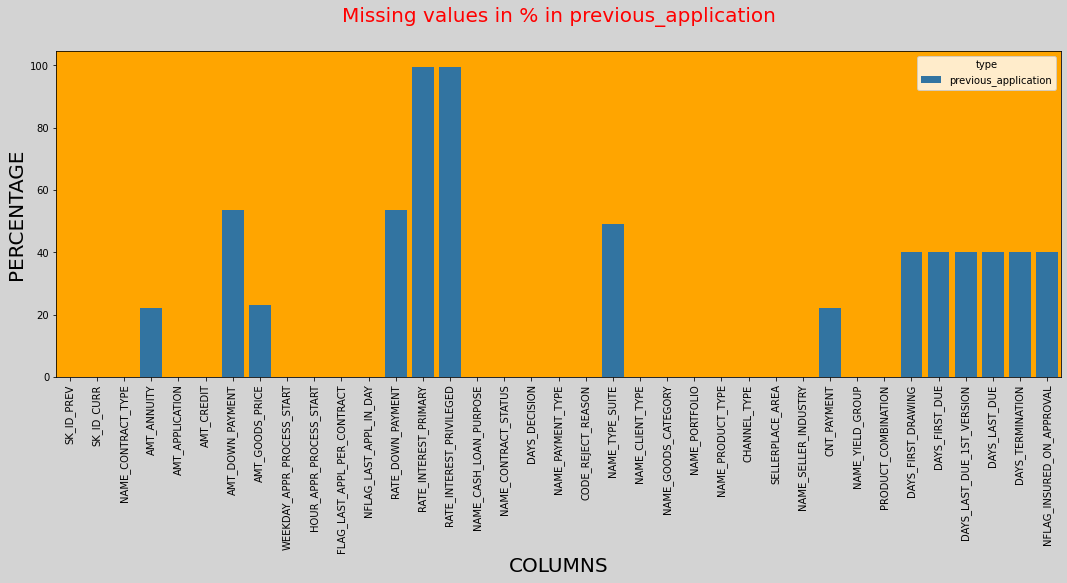

In [13]:
fig = plt.figure(figsize=(18,6))
miss_previous_application = pd.DataFrame((previous_application.isnull().sum())*100/previous_application.shape[0]).reset_index()
miss_previous_application["type"] = "previous_application"
ax = sns.barplot("index",0,data=miss_previous_application,hue="type")
plt.xticks(rotation =90,fontsize =10)
plt.title("Missing values in % in previous_application\n", color= 'red', fontsize = 20)
plt.ylabel("PERCENTAGE", fontsize = 20)
plt.xlabel("COLUMNS", fontsize = 20)
ax.set_facecolor("orange")
fig.set_facecolor("lightgrey")

In [14]:
round(100*(previous_application.isnull().sum()/len(previous_application.index)),2)

SK_ID_PREV                      0.00
SK_ID_CURR                      0.00
NAME_CONTRACT_TYPE              0.00
AMT_ANNUITY                    22.29
AMT_APPLICATION                 0.00
AMT_CREDIT                      0.00
AMT_DOWN_PAYMENT               53.64
AMT_GOODS_PRICE                23.08
WEEKDAY_APPR_PROCESS_START      0.00
HOUR_APPR_PROCESS_START         0.00
FLAG_LAST_APPL_PER_CONTRACT     0.00
NFLAG_LAST_APPL_IN_DAY          0.00
RATE_DOWN_PAYMENT              53.64
RATE_INTEREST_PRIMARY          99.64
RATE_INTEREST_PRIVILEGED       99.64
NAME_CASH_LOAN_PURPOSE          0.00
NAME_CONTRACT_STATUS            0.00
DAYS_DECISION                   0.00
NAME_PAYMENT_TYPE               0.00
CODE_REJECT_REASON              0.00
NAME_TYPE_SUITE                49.12
NAME_CLIENT_TYPE                0.00
NAME_GOODS_CATEGORY             0.00
NAME_PORTFOLIO                  0.00
NAME_PRODUCT_TYPE               0.00
CHANNEL_TYPE                    0.00
SELLERPLACE_AREA                0.00
N

- Missing values more than 50% those columns has to drop.

- As per Industrial Standard, max Threshold limit can be between 40% to 50 % depending upon the data acquired in specific sector.

In [15]:
previous_application=previous_application.drop([ 'AMT_DOWN_PAYMENT', 'RATE_DOWN_PAYMENT', 'RATE_INTEREST_PRIMARY',
       "RATE_INTEREST_PRIVILEGED"],axis=1)

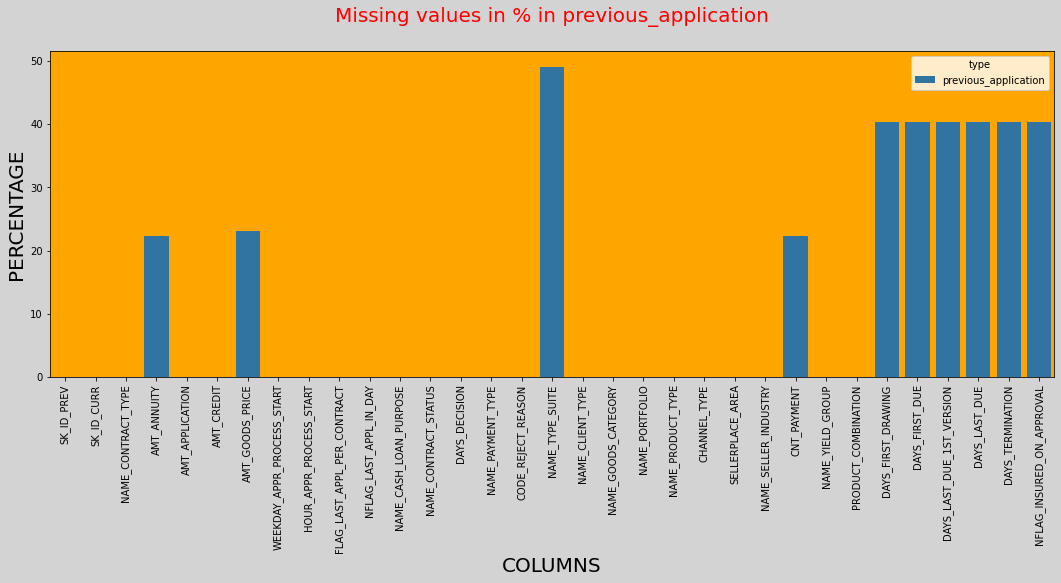

In [16]:
fig = plt.figure(figsize=(18,6))
miss_previous_application = pd.DataFrame((previous_application.isnull().sum())*100/previous_application.shape[0]).reset_index()
miss_previous_application["type"] = "previous_application"
ax = sns.barplot("index",0,data=miss_previous_application,hue="type")
plt.xticks(rotation =90,fontsize =10)
plt.title("Missing values in % in previous_application\n", color= 'red', fontsize = 20)
plt.ylabel("PERCENTAGE",fontsize =20)
plt.xlabel("COLUMNS",fontsize =20)
ax.set_facecolor("orange")
fig.set_facecolor("lightgrey")

In [17]:
round(100*(previous_application.isnull().sum()/len(previous_application.index)),2)

SK_ID_PREV                      0.00
SK_ID_CURR                      0.00
NAME_CONTRACT_TYPE              0.00
AMT_ANNUITY                    22.29
AMT_APPLICATION                 0.00
AMT_CREDIT                      0.00
AMT_GOODS_PRICE                23.08
WEEKDAY_APPR_PROCESS_START      0.00
HOUR_APPR_PROCESS_START         0.00
FLAG_LAST_APPL_PER_CONTRACT     0.00
NFLAG_LAST_APPL_IN_DAY          0.00
NAME_CASH_LOAN_PURPOSE          0.00
NAME_CONTRACT_STATUS            0.00
DAYS_DECISION                   0.00
NAME_PAYMENT_TYPE               0.00
CODE_REJECT_REASON              0.00
NAME_TYPE_SUITE                49.12
NAME_CLIENT_TYPE                0.00
NAME_GOODS_CATEGORY             0.00
NAME_PORTFOLIO                  0.00
NAME_PRODUCT_TYPE               0.00
CHANNEL_TYPE                    0.00
SELLERPLACE_AREA                0.00
NAME_SELLER_INDUSTRY            0.00
CNT_PAYMENT                    22.29
NAME_YIELD_GROUP                0.00
PRODUCT_COMBINATION             0.02
D

- MISSING values Suggestion

In [18]:
print("AMT_ANNUITY NULL COUNT:" ,previous_application['AMT_ANNUITY'].isnull().sum())

AMT_ANNUITY NULL COUNT: 372235


In [19]:
previous_application['AMT_ANNUITY'].describe()

count    1.297979e+06
mean     1.595512e+04
std      1.478214e+04
min      0.000000e+00
25%      6.321780e+03
50%      1.125000e+04
75%      2.065842e+04
max      4.180581e+05
Name: AMT_ANNUITY, dtype: float64

In [20]:
application_data = application_data.drop([ 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3',
       'APARTMENTS_AVG', 'BASEMENTAREA_AVG', 'YEARS_BEGINEXPLUATATION_AVG',
       'YEARS_BUILD_AVG', 'COMMONAREA_AVG', 'ELEVATORS_AVG', 'ENTRANCES_AVG',
       'FLOORSMAX_AVG', 'FLOORSMIN_AVG', 'LANDAREA_AVG',
       'LIVINGAPARTMENTS_AVG', 'LIVINGAREA_AVG', 'NONLIVINGAPARTMENTS_AVG',
       'NONLIVINGAREA_AVG', 'APARTMENTS_MODE', 'BASEMENTAREA_MODE',
       'YEARS_BEGINEXPLUATATION_MODE', 'YEARS_BUILD_MODE', 'COMMONAREA_MODE',
       'ELEVATORS_MODE', 'ENTRANCES_MODE', 'FLOORSMAX_MODE', 'FLOORSMIN_MODE',
       'LANDAREA_MODE', 'LIVINGAPARTMENTS_MODE', 'LIVINGAREA_MODE',
       'NONLIVINGAPARTMENTS_MODE', 'NONLIVINGAREA_MODE', 'APARTMENTS_MEDI',
       'BASEMENTAREA_MEDI', 'YEARS_BEGINEXPLUATATION_MEDI', 'YEARS_BUILD_MEDI',
       'COMMONAREA_MEDI', 'ELEVATORS_MEDI', 'ENTRANCES_MEDI', 'FLOORSMAX_MEDI',
       'FLOORSMIN_MEDI', 'LANDAREA_MEDI', 'LIVINGAPARTMENTS_MEDI',
       'LIVINGAREA_MEDI', 'NONLIVINGAPARTMENTS_MEDI', 'NONLIVINGAREA_MEDI',
       'FONDKAPREMONT_MODE', 'HOUSETYPE_MODE', 'TOTALAREA_MODE',
       'WALLSMATERIAL_MODE', 'EMERGENCYSTATE_MODE',"OWN_CAR_AGE","OCCUPATION_TYPE"],axis=1)

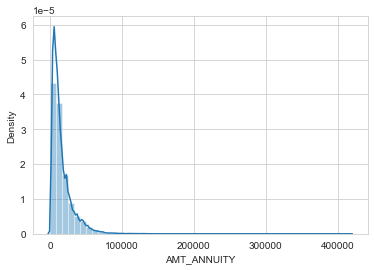

In [21]:
sns.set_style('whitegrid') 
sns.distplot(previous_application['AMT_ANNUITY']) 
plt.show()

- Suggestion
We can Fill NA with 15955 i.e. Mean for this field

In [22]:
print("AMT_GOODS_PRICE NULL COUNT:" ,previous_application['AMT_GOODS_PRICE'].isnull().sum())

AMT_GOODS_PRICE NULL COUNT: 385515


In [23]:
previous_application['AMT_GOODS_PRICE'].describe()

count    1.284699e+06
mean     2.278473e+05
std      3.153966e+05
min      0.000000e+00
25%      5.084100e+04
50%      1.123200e+05
75%      2.340000e+05
max      6.905160e+06
Name: AMT_GOODS_PRICE, dtype: float64

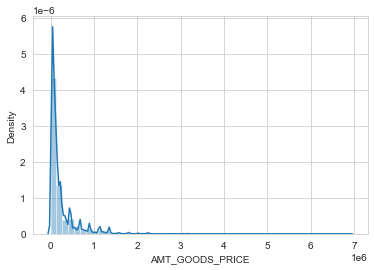

In [24]:
sns.set_style('whitegrid') 
sns.distplot(previous_application['AMT_GOODS_PRICE']) 
plt.show()

- Suggestion
We can Fill NA with Median i.e. with 112320

In [25]:
print("NAME_TYPE_SUITE NULL COUNT:" ,previous_application['NAME_TYPE_SUITE'].isnull().sum())

NAME_TYPE_SUITE NULL COUNT: 820405


In [26]:
previous_application['NAME_TYPE_SUITE'].value_counts()

Unaccompanied      508970
Family             213263
Spouse, partner     67069
Children            31566
Other_B             17624
Other_A              9077
Group of people      2240
Name: NAME_TYPE_SUITE, dtype: int64

- Suggestion
We can Fill NA with Unaccompanied i.e. Mode for this field

In [27]:
print("CNT_PAYMENT NULL COUNT:" ,previous_application['CNT_PAYMENT'].isnull().sum())

CNT_PAYMENT NULL COUNT: 372230


In [28]:
previous_application['CNT_PAYMENT'].describe()

count    1.297984e+06
mean     1.605408e+01
std      1.456729e+01
min      0.000000e+00
25%      6.000000e+00
50%      1.200000e+01
75%      2.400000e+01
max      8.400000e+01
Name: CNT_PAYMENT, dtype: float64

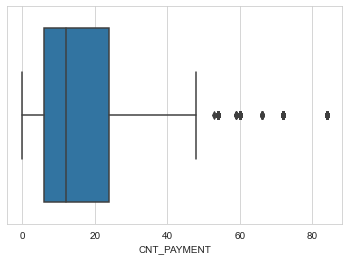

In [29]:
sns.set_style('whitegrid') 
sns.boxplot(previous_application['CNT_PAYMENT']) 
plt.show()

- Suggestion
We can Fill NA with Median

In [30]:
print("DAYS_FIRST_DRAWING :" ,previous_application['CNT_PAYMENT'].isnull().sum())

DAYS_FIRST_DRAWING : 372230


In [31]:
previous_application['DAYS_FIRST_DRAWING'].describe()

count    997149.000000
mean     342209.855039
std       88916.115834
min       -2922.000000
25%      365243.000000
50%      365243.000000
75%      365243.000000
max      365243.000000
Name: DAYS_FIRST_DRAWING, dtype: float64

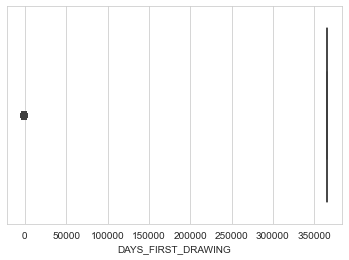

In [32]:
sns.set_style('whitegrid') 
sns.boxplot(previous_application['DAYS_FIRST_DRAWING']) 
plt.show()

- Suggestion
We can Fill NA with Median

In [33]:
print("DAYS_FIRST_DUE :" ,previous_application['DAYS_FIRST_DUE'].isnull().sum())

DAYS_FIRST_DUE : 673065


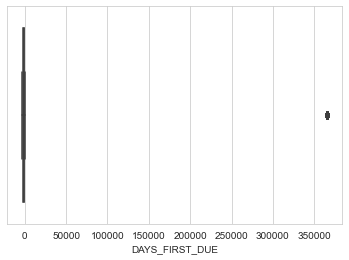

In [34]:
sns.set_style('whitegrid') 
sns.boxplot(previous_application['DAYS_FIRST_DUE']) 
plt.show()

- Suggestion
We can Fill NA with Median i.e. -831

In [35]:
print("DAYS_LAST_DUE_1ST_VERSION :" ,previous_application['DAYS_LAST_DUE_1ST_VERSION'].isnull().sum())

DAYS_LAST_DUE_1ST_VERSION : 673065


In [36]:
previous_application['DAYS_LAST_DUE_1ST_VERSION'].describe()

count    997149.000000
mean      33767.774054
std      106857.034789
min       -2801.000000
25%       -1242.000000
50%        -361.000000
75%         129.000000
max      365243.000000
Name: DAYS_LAST_DUE_1ST_VERSION, dtype: float64

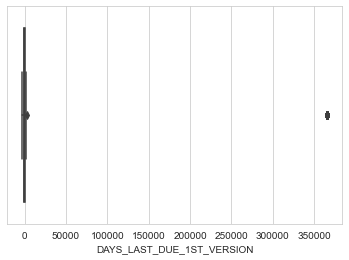

In [37]:
sns.set_style('whitegrid') 
sns.boxplot(previous_application['DAYS_LAST_DUE_1ST_VERSION']) 
plt.show()

- Suggestion
We can Fill NA with Median

In [38]:
print("DAYS_LAST_DUE:" ,previous_application['DAYS_LAST_DUE'].isnull().sum())

DAYS_LAST_DUE: 673065


In [39]:
previous_application['DAYS_LAST_DUE'].describe()

count    997149.000000
mean      76582.403064
std      149647.415123
min       -2889.000000
25%       -1314.000000
50%        -537.000000
75%         -74.000000
max      365243.000000
Name: DAYS_LAST_DUE, dtype: float64

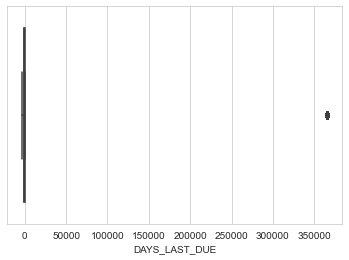

In [40]:
sns.set_style('whitegrid') 
sns.boxplot(previous_application['DAYS_LAST_DUE']) 
plt.show()

- Suggestion
We can Fill NA with Median i.e. -537

In [41]:
print("DAYS_TERMINATION :" ,previous_application['DAYS_TERMINATION'].isnull().sum())

DAYS_TERMINATION : 673065


In [42]:
previous_application['DAYS_TERMINATION'].describe()

count    997149.000000
mean      81992.343838
std      153303.516729
min       -2874.000000
25%       -1270.000000
50%        -499.000000
75%         -44.000000
max      365243.000000
Name: DAYS_TERMINATION, dtype: float64

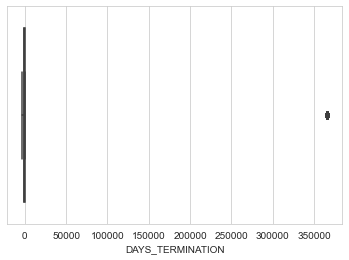

In [43]:
sns.set_style('whitegrid') 
sns.boxplot(previous_application['DAYS_TERMINATION']) 
plt.show()

- Suggestion
We can Fill NA with Median -499

In [44]:
print("NFLAG_INSURED_ON_APPROVAL:" ,previous_application['NFLAG_INSURED_ON_APPROVAL'].isnull().sum())

NFLAG_INSURED_ON_APPROVAL: 673065


In [45]:
previous_application['NFLAG_INSURED_ON_APPROVAL'].value_counts()

0.0    665527
1.0    331622
Name: NFLAG_INSURED_ON_APPROVAL, dtype: int64

- Suggestion
We can Fill NA with 0 i.e. Mode for this field

In [46]:
previous_application.isnull().sum()

SK_ID_PREV                          0
SK_ID_CURR                          0
NAME_CONTRACT_TYPE                  0
AMT_ANNUITY                    372235
AMT_APPLICATION                     0
AMT_CREDIT                          1
AMT_GOODS_PRICE                385515
WEEKDAY_APPR_PROCESS_START          0
HOUR_APPR_PROCESS_START             0
FLAG_LAST_APPL_PER_CONTRACT         0
NFLAG_LAST_APPL_IN_DAY              0
NAME_CASH_LOAN_PURPOSE              0
NAME_CONTRACT_STATUS                0
DAYS_DECISION                       0
NAME_PAYMENT_TYPE                   0
CODE_REJECT_REASON                  0
NAME_TYPE_SUITE                820405
NAME_CLIENT_TYPE                    0
NAME_GOODS_CATEGORY                 0
NAME_PORTFOLIO                      0
NAME_PRODUCT_TYPE                   0
CHANNEL_TYPE                        0
SELLERPLACE_AREA                    0
NAME_SELLER_INDUSTRY                0
CNT_PAYMENT                    372230
NAME_YIELD_GROUP                    0
PRODUCT_COMB

In [47]:
print("AMT_CREDIT :" ,previous_application['AMT_CREDIT'].isnull().sum())

AMT_CREDIT : 1


In [48]:
previous_application['AMT_CREDIT'].describe()

count    1.670213e+06
mean     1.961140e+05
std      3.185746e+05
min      0.000000e+00
25%      2.416050e+04
50%      8.054100e+04
75%      2.164185e+05
max      6.905160e+06
Name: AMT_CREDIT, dtype: float64

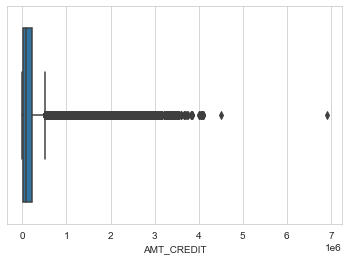

In [49]:
sns.set_style('whitegrid') 
sns.boxplot(previous_application['AMT_CREDIT']) 
plt.show()

- Suggestion
We can Fill NA with Median i.e 80541

In [50]:
print("PRODUCT_COMBINATION :" ,previous_application['PRODUCT_COMBINATION'].isnull().sum())

PRODUCT_COMBINATION : 346


In [51]:
previous_application['PRODUCT_COMBINATION'].value_counts()

Cash                              285990
POS household with interest       263622
POS mobile with interest          220670
Cash X-Sell: middle               143883
Cash X-Sell: low                  130248
Card Street                       112582
POS industry with interest         98833
POS household without interest     82908
Card X-Sell                        80582
Cash Street: high                  59639
Cash X-Sell: high                  59301
Cash Street: middle                34658
Cash Street: low                   33834
POS mobile without interest        24082
POS other with interest            23879
POS industry without interest      12602
POS others without interest         2555
Name: PRODUCT_COMBINATION, dtype: int64

- Suggestion
We can Fill NA with Mode

In [52]:
class color:
   PURPLE = '\033[95m'
   CYAN = '\033[96m'
   DARKCYAN = '\033[36m'
   BLUE = '\033[94m'
   GREEN = '\033[92m'
   YELLOW = '\033[93m'
   RED = '\033[91m'
   BOLD = '\033[1m'
   UNDERLINE = '\033[4m'
   END = '\033[0m'

- Separating numerical and categorical columns from previous_application

In [53]:
obj_dtypes = [i for i in previous_application.select_dtypes(include=np.object).columns if i not in ["type"] ]
num_dtypes = [i for i in previous_application.select_dtypes(include = np.number).columns if i not in ['SK_ID_CURR'] + [ 'TARGET']]


In [54]:
print('Categorical Columns\n')
for x in range(len(obj_dtypes)): 
    print(obj_dtypes[x])

Categorical Columns

NAME_CONTRACT_TYPE
WEEKDAY_APPR_PROCESS_START
FLAG_LAST_APPL_PER_CONTRACT
NAME_CASH_LOAN_PURPOSE
NAME_CONTRACT_STATUS
NAME_PAYMENT_TYPE
CODE_REJECT_REASON
NAME_TYPE_SUITE
NAME_CLIENT_TYPE
NAME_GOODS_CATEGORY
NAME_PORTFOLIO
NAME_PRODUCT_TYPE
CHANNEL_TYPE
NAME_SELLER_INDUSTRY
NAME_YIELD_GROUP
PRODUCT_COMBINATION


In [55]:
print('Numerical\n')
for x in range(len(obj_dtypes)): 
    print(obj_dtypes[x])

Numerical

NAME_CONTRACT_TYPE
WEEKDAY_APPR_PROCESS_START
FLAG_LAST_APPL_PER_CONTRACT
NAME_CASH_LOAN_PURPOSE
NAME_CONTRACT_STATUS
NAME_PAYMENT_TYPE
CODE_REJECT_REASON
NAME_TYPE_SUITE
NAME_CLIENT_TYPE
NAME_GOODS_CATEGORY
NAME_PORTFOLIO
NAME_PRODUCT_TYPE
CHANNEL_TYPE
NAME_SELLER_INDUSTRY
NAME_YIELD_GROUP
PRODUCT_COMBINATION


- Percentage of Missing values in application_data

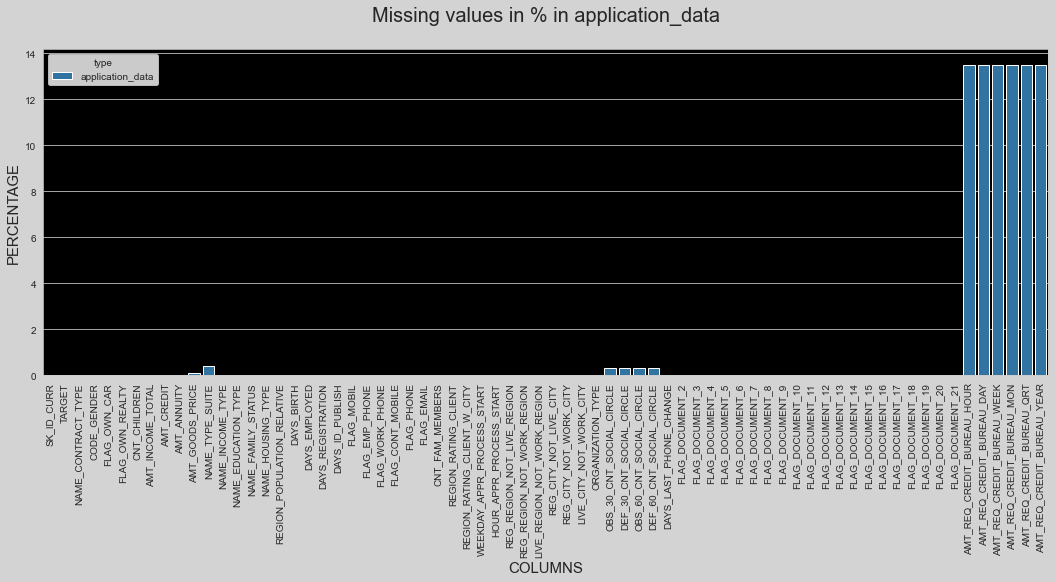

In [56]:
fig = plt.figure(figsize=(18,6))
miss_application_data = pd.DataFrame((application_data.isnull().sum())*100/application_data.shape[0]).reset_index()
miss_application_data["type"] = "application_data"
ax = sns.barplot("index",0,data=miss_application_data,hue="type")
plt.xticks(rotation =90,fontsize =10)
plt.title("Missing values in % in application_data\n", fontsize = 20)
plt.ylabel("PERCENTAGE", fontsize = 15)
plt.xlabel("COLUMNS", fontsize = 15)
ax.set_facecolor("k")
fig.set_facecolor("lightgrey")

In [57]:
round(100*(application_data.isnull().sum()/len(application_data.index)),2)

SK_ID_CURR                      0.00
TARGET                          0.00
NAME_CONTRACT_TYPE              0.00
CODE_GENDER                     0.00
FLAG_OWN_CAR                    0.00
FLAG_OWN_REALTY                 0.00
CNT_CHILDREN                    0.00
AMT_INCOME_TOTAL                0.00
AMT_CREDIT                      0.00
AMT_ANNUITY                     0.00
AMT_GOODS_PRICE                 0.09
NAME_TYPE_SUITE                 0.42
NAME_INCOME_TYPE                0.00
NAME_EDUCATION_TYPE             0.00
NAME_FAMILY_STATUS              0.00
NAME_HOUSING_TYPE               0.00
REGION_POPULATION_RELATIVE      0.00
DAYS_BIRTH                      0.00
DAYS_EMPLOYED                   0.00
DAYS_REGISTRATION               0.00
DAYS_ID_PUBLISH                 0.00
FLAG_MOBIL                      0.00
FLAG_EMP_PHONE                  0.00
FLAG_WORK_PHONE                 0.00
FLAG_CONT_MOBILE                0.00
FLAG_PHONE                      0.00
FLAG_EMAIL                      0.00
C

- Removing unwanted columns

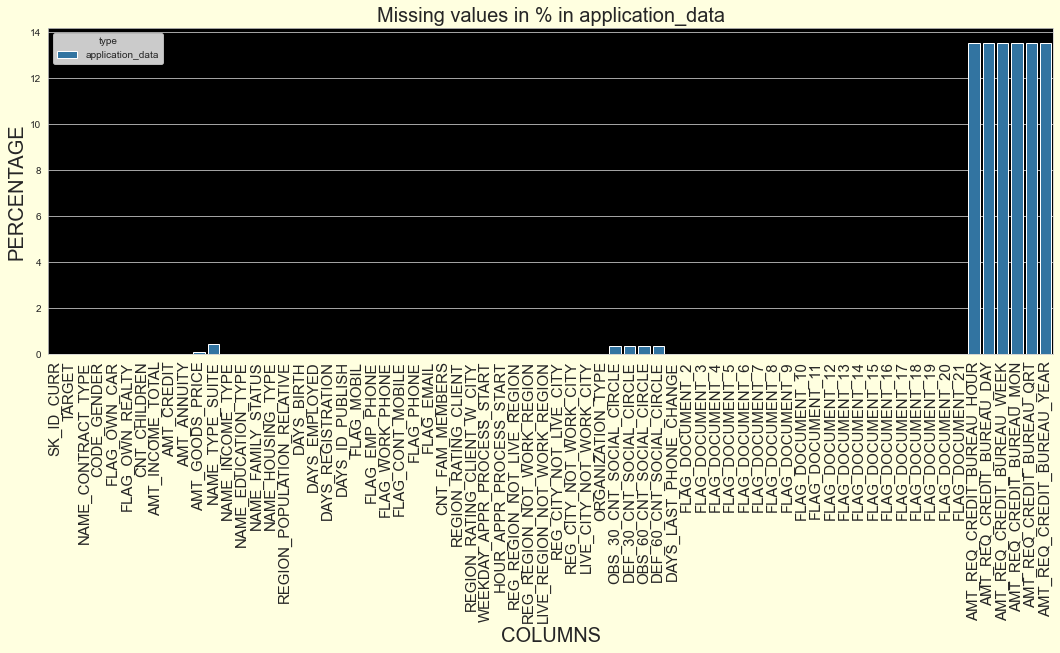

In [58]:
fig = plt.figure(figsize=(18,6))
miss_application_data = pd.DataFrame((application_data.isnull().sum())*100/application_data.shape[0]).reset_index()
miss_application_data["type"] = "application_data"
ax = sns.barplot("index",0,data=miss_application_data,hue="type")
plt.xticks(rotation =90,fontsize =15)
plt.title("Missing values in % in application_data", fontsize = 20)
plt.ylabel("PERCENTAGE", fontsize = 20)
plt.xlabel("COLUMNS", fontsize = 20)
ax.set_facecolor("k")
fig.set_facecolor("lightyellow")

In [59]:
round(100*(application_data.isnull().sum()/len(application_data.index)),2)

SK_ID_CURR                      0.00
TARGET                          0.00
NAME_CONTRACT_TYPE              0.00
CODE_GENDER                     0.00
FLAG_OWN_CAR                    0.00
FLAG_OWN_REALTY                 0.00
CNT_CHILDREN                    0.00
AMT_INCOME_TOTAL                0.00
AMT_CREDIT                      0.00
AMT_ANNUITY                     0.00
AMT_GOODS_PRICE                 0.09
NAME_TYPE_SUITE                 0.42
NAME_INCOME_TYPE                0.00
NAME_EDUCATION_TYPE             0.00
NAME_FAMILY_STATUS              0.00
NAME_HOUSING_TYPE               0.00
REGION_POPULATION_RELATIVE      0.00
DAYS_BIRTH                      0.00
DAYS_EMPLOYED                   0.00
DAYS_REGISTRATION               0.00
DAYS_ID_PUBLISH                 0.00
FLAG_MOBIL                      0.00
FLAG_EMP_PHONE                  0.00
FLAG_WORK_PHONE                 0.00
FLAG_CONT_MOBILE                0.00
FLAG_PHONE                      0.00
FLAG_EMAIL                      0.00
C

- MISSING values Suggestion

In [60]:
print("AMT_REQ_CREDIT_BUREAU_DAY NAN COUNT :" ,application_data['AMT_REQ_CREDIT_BUREAU_DAY'].isnull().sum())

AMT_REQ_CREDIT_BUREAU_DAY NAN COUNT : 41519


In [61]:
application_data['AMT_REQ_CREDIT_BUREAU_DAY'].describe()

count    265992.000000
mean          0.007000
std           0.110757
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           9.000000
Name: AMT_REQ_CREDIT_BUREAU_DAY, dtype: float64

- Suggestion
We can Fill NA with Median i.e. 0

In [62]:
print("AMT_REQ_CREDIT_BUREAU_HOUR NAN COUNT :" ,application_data['AMT_REQ_CREDIT_BUREAU_HOUR'].isnull().sum())

AMT_REQ_CREDIT_BUREAU_HOUR NAN COUNT : 41519


In [63]:
application_data['AMT_REQ_CREDIT_BUREAU_HOUR'].describe()

count    265992.000000
mean          0.006402
std           0.083849
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           4.000000
Name: AMT_REQ_CREDIT_BUREAU_HOUR, dtype: float64

- Suggestion
We can Fill NA with 0 i.e. Median for this field

In [64]:
print("AMT_REQ_CREDIT_BUREAU_MON NAN COUNT :" ,application_data['AMT_REQ_CREDIT_BUREAU_MON'].isnull().sum())

AMT_REQ_CREDIT_BUREAU_MON NAN COUNT : 41519


In [65]:
application_data['AMT_REQ_CREDIT_BUREAU_MON'].describe()

count    265992.000000
mean          0.267395
std           0.916002
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          27.000000
Name: AMT_REQ_CREDIT_BUREAU_MON, dtype: float64

- Suggestion
We can Fill NA with Median value 0

In [66]:
print("AMT_REQ_CREDIT_BUREAU_QRT NAN COUNT :" ,application_data['AMT_REQ_CREDIT_BUREAU_QRT'].isnull().sum())

AMT_REQ_CREDIT_BUREAU_QRT NAN COUNT : 41519


- Suggestion
We can Fill NA with Median value 0

In [67]:
print("AMT_REQ_CREDIT_BUREAU_WEEK NAN COUNT :" ,application_data['AMT_REQ_CREDIT_BUREAU_WEEK'].isnull().sum())

AMT_REQ_CREDIT_BUREAU_WEEK NAN COUNT : 41519


In [68]:
application_data['AMT_REQ_CREDIT_BUREAU_WEEK'].describe()

count    265992.000000
mean          0.034362
std           0.204685
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           8.000000
Name: AMT_REQ_CREDIT_BUREAU_WEEK, dtype: float64

- Suggestion
We can Fill NA with Median value 0

In [69]:
print("AMT_REQ_CREDIT_BUREAU_YEAR NAN COUNT :" ,application_data['AMT_REQ_CREDIT_BUREAU_YEAR'].isnull().sum())

AMT_REQ_CREDIT_BUREAU_YEAR NAN COUNT : 41519


In [71]:
application_data['AMT_REQ_CREDIT_BUREAU_YEAR'].describe()

count    265992.000000
mean          1.899974
std           1.869295
min           0.000000
25%           0.000000
50%           1.000000
75%           3.000000
max          25.000000
Name: AMT_REQ_CREDIT_BUREAU_YEAR, dtype: float64

- Suggestion
We can Fill NA with Median value 0

In [70]:
print("DEF_30_CNT_SOCIAL_CIRCLE NAN COUNT :" ,application_data['DEF_30_CNT_SOCIAL_CIRCLE'].isnull().sum())

DEF_30_CNT_SOCIAL_CIRCLE NAN COUNT : 1021


In [71]:
application_data['DEF_30_CNT_SOCIAL_CIRCLE'].describe()

count    306490.000000
mean          0.143421
std           0.446698
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          34.000000
Name: DEF_30_CNT_SOCIAL_CIRCLE, dtype: float64

- Suggestion
We can Fill NA with Median value 0

In [72]:
print("DEF_30_CNT_SOCIAL_CIRCLE :" ,application_data['DEF_30_CNT_SOCIAL_CIRCLE'].isnull().sum())

DEF_30_CNT_SOCIAL_CIRCLE : 1021


In [73]:
application_data['DEF_30_CNT_SOCIAL_CIRCLE'].describe()

count    306490.000000
mean          0.143421
std           0.446698
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          34.000000
Name: DEF_30_CNT_SOCIAL_CIRCLE, dtype: float64

- Suggestion
We can Fill NA with Median value 0

In [74]:
print("OBS_60_CNT_SOCIAL_CIRCLE :" ,application_data['OBS_60_CNT_SOCIAL_CIRCLE'].isnull().sum())

OBS_60_CNT_SOCIAL_CIRCLE : 1021


In [75]:
application_data['OBS_60_CNT_SOCIAL_CIRCLE'].describe()

count    306490.000000
mean          1.405292
std           2.379803
min           0.000000
25%           0.000000
50%           0.000000
75%           2.000000
max         344.000000
Name: OBS_60_CNT_SOCIAL_CIRCLE, dtype: float64

- Suggestion
We can Fill NA with Median value 0

In [76]:
print("DEF_60_CNT_SOCIAL_CIRCLE :" ,application_data['DEF_60_CNT_SOCIAL_CIRCLE'].isnull().sum())

DEF_60_CNT_SOCIAL_CIRCLE : 1021


In [77]:
application_data['DEF_60_CNT_SOCIAL_CIRCLE'].describe()

count    306490.000000
mean          0.100049
std           0.362291
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          24.000000
Name: DEF_60_CNT_SOCIAL_CIRCLE, dtype: float64

- Suggestion
We can Fill NA with Median value 0

In [78]:
application_data.isnull().sum()

SK_ID_CURR                         0
TARGET                             0
NAME_CONTRACT_TYPE                 0
CODE_GENDER                        0
FLAG_OWN_CAR                       0
FLAG_OWN_REALTY                    0
CNT_CHILDREN                       0
AMT_INCOME_TOTAL                   0
AMT_CREDIT                         0
AMT_ANNUITY                       12
AMT_GOODS_PRICE                  278
NAME_TYPE_SUITE                 1292
NAME_INCOME_TYPE                   0
NAME_EDUCATION_TYPE                0
NAME_FAMILY_STATUS                 0
NAME_HOUSING_TYPE                  0
REGION_POPULATION_RELATIVE         0
DAYS_BIRTH                         0
DAYS_EMPLOYED                      0
DAYS_REGISTRATION                  0
DAYS_ID_PUBLISH                    0
FLAG_MOBIL                         0
FLAG_EMP_PHONE                     0
FLAG_WORK_PHONE                    0
FLAG_CONT_MOBILE                   0
FLAG_PHONE                         0
FLAG_EMAIL                         0
C

In [79]:
print("AMT_ANNUITY  :" ,application_data['AMT_ANNUITY'].isnull().sum())

AMT_ANNUITY  : 12


In [80]:
application_data['AMT_ANNUITY'].describe()

count    307499.000000
mean      27108.573909
std       14493.737315
min        1615.500000
25%       16524.000000
50%       24903.000000
75%       34596.000000
max      258025.500000
Name: AMT_ANNUITY, dtype: float64

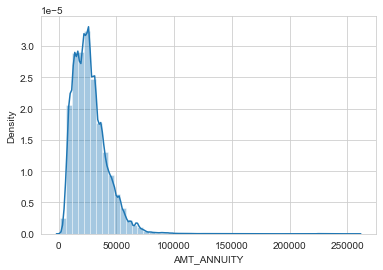

In [81]:
sns.set_style('whitegrid') 
sns.distplot(application_data['AMT_ANNUITY']) 
plt.show()

- Suggestion
We can Fill NA with Median value 0

In [82]:
print("AMT_GOODS_PRICE   :" ,application_data['AMT_GOODS_PRICE'].isnull().sum())

AMT_GOODS_PRICE   : 278


In [83]:
application_data['AMT_GOODS_PRICE'].describe()

count    3.072330e+05
mean     5.383962e+05
std      3.694465e+05
min      4.050000e+04
25%      2.385000e+05
50%      4.500000e+05
75%      6.795000e+05
max      4.050000e+06
Name: AMT_GOODS_PRICE, dtype: float64

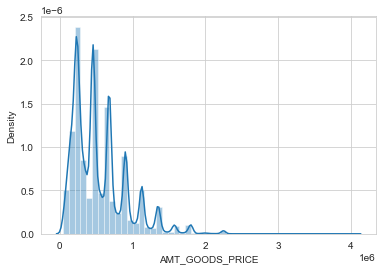

In [84]:
sns.set_style('whitegrid') 
sns.distplot(application_data['AMT_GOODS_PRICE']) 
plt.show()

- Suggestion
We observed graph is right skewed.

In [85]:
print("NAME_TYPE_SUITE :" ,application_data['NAME_TYPE_SUITE'].isnull().sum())

NAME_TYPE_SUITE : 1292


In [86]:
application_data['NAME_TYPE_SUITE'].value_counts()

Unaccompanied      248526
Family              40149
Spouse, partner     11370
Children             3267
Other_B              1770
Other_A               866
Group of people       271
Name: NAME_TYPE_SUITE, dtype: int64

- Suggestion
Most frequent value observed is Unaccompanied.

In [87]:
print("CNT_FAM_MEMBERS :" ,application_data['CNT_FAM_MEMBERS'].isnull().sum())

CNT_FAM_MEMBERS : 2


In [88]:
application_data['CNT_FAM_MEMBERS'].describe()

count    307509.000000
mean          2.152665
std           0.910682
min           1.000000
25%           2.000000
50%           2.000000
75%           3.000000
max          20.000000
Name: CNT_FAM_MEMBERS, dtype: float64

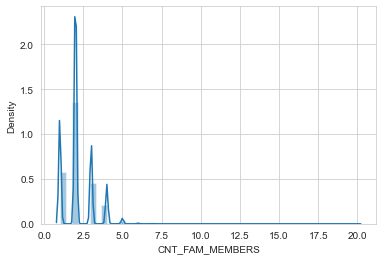

In [89]:
sns.set_style('whitegrid') 
sns.distplot(application_data['CNT_FAM_MEMBERS']) 
plt.show()

- Suggestion
We can Fill NA with Median i.e. 2

In [90]:
print("DAYS_LAST_PHONE_CHANGE :" ,application_data['DAYS_LAST_PHONE_CHANGE'].isnull().sum())

DAYS_LAST_PHONE_CHANGE : 1


In [91]:
application_data['DAYS_LAST_PHONE_CHANGE'].describe()

count    307510.000000
mean       -962.858788
std         826.808487
min       -4292.000000
25%       -1570.000000
50%        -757.000000
75%        -274.000000
max           0.000000
Name: DAYS_LAST_PHONE_CHANGE, dtype: float64

In [92]:
import statistics 
statistics.mode(application_data['DAYS_LAST_PHONE_CHANGE'])

0.0

- Suggestion
We can Fill NA with Mode

- Understanding of datatype in application_data

In [93]:
print(type(application_data.info()))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 70 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   307511 non-null  int64  
 1   TARGET                       307511 non-null  int64  
 2   NAME_CONTRACT_TYPE           307511 non-null  object 
 3   CODE_GENDER                  307511 non-null  object 
 4   FLAG_OWN_CAR                 307511 non-null  object 
 5   FLAG_OWN_REALTY              307511 non-null  object 
 6   CNT_CHILDREN                 307511 non-null  int64  
 7   AMT_INCOME_TOTAL             307511 non-null  float64
 8   AMT_CREDIT                   307511 non-null  float64
 9   AMT_ANNUITY                  307499 non-null  float64
 10  AMT_GOODS_PRICE              307233 non-null  float64
 11  NAME_TYPE_SUITE              306219 non-null  object 
 12  NAME_INCOME_TYPE             307511 non-null  object 
 13 

- Converting negative values to absolute values

In [94]:
application_data['DAYS_BIRTH'] = abs(application_data['DAYS_BIRTH'])
application_data['DAYS_ID_PUBLISH'] = abs(application_data['DAYS_ID_PUBLISH'])
application_data['DAYS_ID_PUBLISH'] = abs(application_data['DAYS_ID_PUBLISH'])
application_data['DAYS_LAST_PHONE_CHANGE'] = abs(application_data['DAYS_LAST_PHONE_CHANGE'])

In [95]:
display("application_data")
display(application_data.head())

'application_data'

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,9461,-637,-3648.0,2120,1,1,0,1,1,0,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,2.0,2.0,2.0,2.0,1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,16765,-1188,-1186.0,291,1,1,0,1,1,0,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,1.0,0.0,1.0,0.0,828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,19046,-225,-4260.0,2531,1,1,1,1,1,0,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,0.0,0.0,0.0,0.0,815.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,19005,-3039,-9833.0,2437,1,1,0,1,0,0,2.0,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,2.0,0.0,2.0,0.0,617.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,19932,-3038,-4311.0,3458,1,1,0,1,0,0,1.0,2,2,THURSDAY,11,0,0,0,0,1,1,Religion,0.0,0.0,0.0,0.0,1106.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


- Separating numerical and categorical in application_data

In [96]:
obj_dtypes = [i for i in application_data.select_dtypes(include=np.object).columns if i not in ["type"] ]
num_dtypes = [i for i in application_data.select_dtypes(include = np.number).columns if i not in ['SK_ID_CURR'] + [ 'TARGET']]

In [97]:
print('Categorical Columns\n')
for x in range(len(obj_dtypes)): 
    print(obj_dtypes[x])

Categorical Columns

NAME_CONTRACT_TYPE
CODE_GENDER
FLAG_OWN_CAR
FLAG_OWN_REALTY
NAME_TYPE_SUITE
NAME_INCOME_TYPE
NAME_EDUCATION_TYPE
NAME_FAMILY_STATUS
NAME_HOUSING_TYPE
WEEKDAY_APPR_PROCESS_START
ORGANIZATION_TYPE


In [98]:
print("Numerical Columns\n")
for x in range(len(num_dtypes)): 
    print(num_dtypes[x])

Numerical Columns

CNT_CHILDREN
AMT_INCOME_TOTAL
AMT_CREDIT
AMT_ANNUITY
AMT_GOODS_PRICE
REGION_POPULATION_RELATIVE
DAYS_BIRTH
DAYS_EMPLOYED
DAYS_REGISTRATION
DAYS_ID_PUBLISH
FLAG_MOBIL
FLAG_EMP_PHONE
FLAG_WORK_PHONE
FLAG_CONT_MOBILE
FLAG_PHONE
FLAG_EMAIL
CNT_FAM_MEMBERS
REGION_RATING_CLIENT
REGION_RATING_CLIENT_W_CITY
HOUR_APPR_PROCESS_START
REG_REGION_NOT_LIVE_REGION
REG_REGION_NOT_WORK_REGION
LIVE_REGION_NOT_WORK_REGION
REG_CITY_NOT_LIVE_CITY
REG_CITY_NOT_WORK_CITY
LIVE_CITY_NOT_WORK_CITY
OBS_30_CNT_SOCIAL_CIRCLE
DEF_30_CNT_SOCIAL_CIRCLE
OBS_60_CNT_SOCIAL_CIRCLE
DEF_60_CNT_SOCIAL_CIRCLE
DAYS_LAST_PHONE_CHANGE
FLAG_DOCUMENT_2
FLAG_DOCUMENT_3
FLAG_DOCUMENT_4
FLAG_DOCUMENT_5
FLAG_DOCUMENT_6
FLAG_DOCUMENT_7
FLAG_DOCUMENT_8
FLAG_DOCUMENT_9
FLAG_DOCUMENT_10
FLAG_DOCUMENT_11
FLAG_DOCUMENT_12
FLAG_DOCUMENT_13
FLAG_DOCUMENT_14
FLAG_DOCUMENT_15
FLAG_DOCUMENT_16
FLAG_DOCUMENT_17
FLAG_DOCUMENT_18
FLAG_DOCUMENT_19
FLAG_DOCUMENT_20
FLAG_DOCUMENT_21
AMT_REQ_CREDIT_BUREAU_HOUR
AMT_REQ_CREDIT_BUREAU_

- Imbalance percentage

Text(0.5, 1.0, 'Distribution of gender')

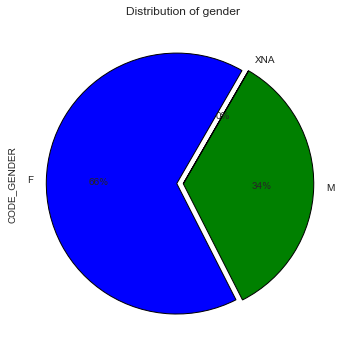

In [99]:
fig = plt.figure(figsize=(13,6))
plt.subplot(121)
application_data["CODE_GENDER"].value_counts().plot.pie(autopct = "%1.0f%%",colors = ["blue","green"],startangle = 60,
                                                                        wedgeprops={"linewidth":1,"edgecolor":"k"},explode=[.05,0,0])
plt.title("Distribution of gender")


- Pie plot indicate imbalanced data
Female : 66%
Male : 34%

- Distribution of Target variable

- TARGET :Target variable (1 - client with payment difficulties: Client had late payment more than X days on at least one of the first Y installments of the loan in sample, 0 - all other cases)

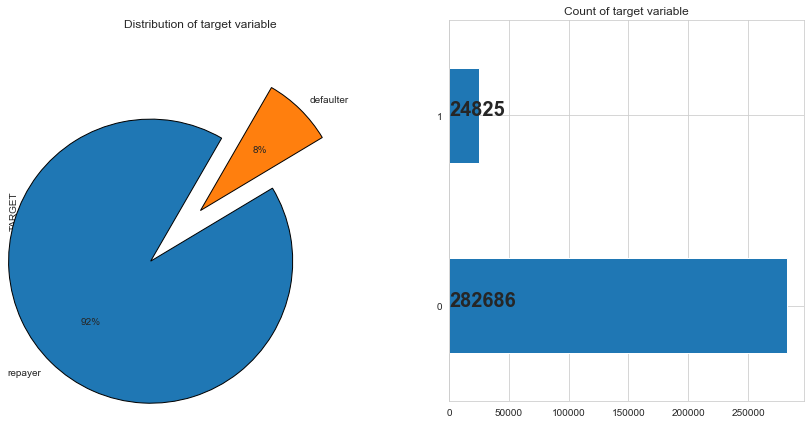

In [100]:
plt.figure(figsize=(14,7))
plt.subplot(121)
application_data["TARGET"].value_counts().plot.pie(autopct = "%1.0f%%",startangle = 60,labels=["repayer","defaulter"],
                                                                        wedgeprops={"linewidth":1,"edgecolor":"k"},explode=[.5,0])
plt.title("Distribution of target variable")

plt.subplot(122)
ax = application_data["TARGET"].value_counts().plot(kind="barh")

for i,j in enumerate(application_data["TARGET"].value_counts().values):
    ax.text(.7,i,j,weight = "bold",fontsize=20)

plt.title("Count of target variable")
plt.show()

- As per Pie plot, found that 8% out of total client population have difficulties in repaying loans.

- Merging application_data and previous_application

In [101]:
application_data_x = application_data[[x for x in application_data.columns if x not in ["TARGET"]]]
previous_application_x = previous_application[[x for x in previous_application.columns if x not in ["TARGET"]]]
application_data_x["type"] = "application_data"
previous_application_x["type"] = "previous_application"
data = pd.concat([application_data_x,previous_application_x],axis=0) 

- Distribution in Contract types in application_data
NAME_CONTRACT_TYPE : Identification if loan is cash , consumer or revolving

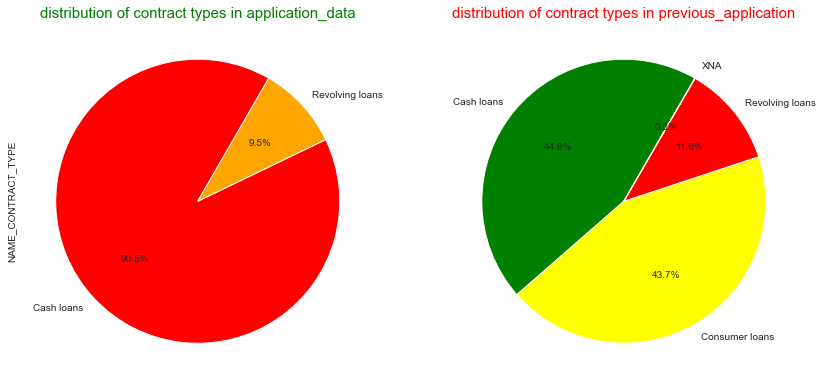

In [102]:
plt.figure(figsize=(14,7))
plt.subplot(121)
data[data["type"] == "application_data"]["NAME_CONTRACT_TYPE"].value_counts().plot.pie(autopct = "%0.1f%%",colors = ["red","orange"],startangle = 60,
                                                                        wedgeprops={"linewidth":1,"edgecolor":"white"})

plt.title("distribution of contract types in application_data", fontsize = 15, color = 'green')

plt.subplot(122)
data[data["type"] == "previous_application"]["NAME_CONTRACT_TYPE"].value_counts().plot.pie(autopct = "%0.1f%%",colors = ["green","yellow",'red'],startangle = 60,
                                                                        wedgeprops={"linewidth":1,"edgecolor":"white"})

plt.ylabel("")
plt.title("distribution of contract types in previous_application", fontsize = 15, color = 'red')
plt.show()

plt.show()

- Pie plot indicates 9.5% & 90.5% of revolving loans and cash loans for distribution of contract types in application_data.
Also for distribution of contract types in previous_application it shows 44.8% & 11.6% respectively.

- Distribution of Contract type by gender

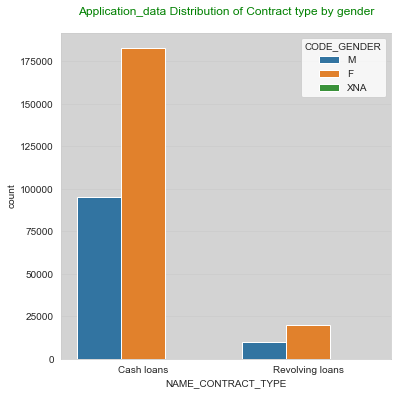

In [103]:
fig  = plt.figure(figsize=(13,6))
plt.subplot(121)
ax = sns.countplot("NAME_CONTRACT_TYPE",hue="CODE_GENDER",data=data[data["type"] == "application_data"])
ax.set_facecolor("lightgrey")
ax.set_title("Application_data Distribution of Contract type by gender\n", color = 'green')

plt.show()

- Count plot indicates that both genders prefer cash loan over revolving loan.

- Distribution of client owning a car by gender.

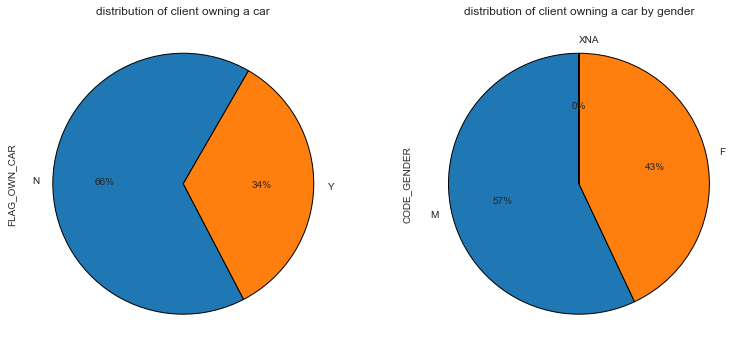

In [104]:
fig = plt.figure(figsize=(13,6))

plt.subplot(121)
data["FLAG_OWN_CAR"].value_counts().plot.pie(autopct = "%1.0f%%",startangle = 60,
                                                                        wedgeprops={"linewidth":1,"edgecolor":"k"})
plt.title("distribution of client owning a car")

plt.subplot(122)
data[data["FLAG_OWN_CAR"] == "Y"]["CODE_GENDER"].value_counts().plot.pie(autopct = "%1.0f%%",startangle = 90,
                                                                        wedgeprops={"linewidth":1,"edgecolor":"k"})
plt.title("distribution of client owning a car by gender")

plt.show()

- As per pie plot we observed that % of male car owner is more than female car owner.

- Distribution of client owning a house or flat by gender

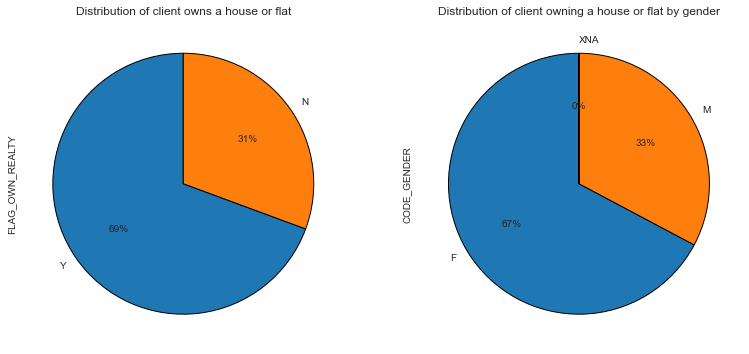

In [105]:
plt.figure(figsize=(13,6))
plt.subplot(121)
data["FLAG_OWN_REALTY"].value_counts().plot.pie(autopct = "%1.0f%%",startangle = 90,
                                              wedgeprops={"linewidth":1,"edgecolor":"k"})
plt.title("Distribution of client owns a house or flat")

plt.subplot(122)
data[data["FLAG_OWN_REALTY"] == "Y"]["CODE_GENDER"].value_counts().plot.pie(autopct = "%1.0f%%", startangle = 90,
                                                                        wedgeprops={"linewidth":1,"edgecolor":"k"})
plt.title("Distribution of client owning a house or flat by gender")
plt.show()

- As per Pie plot observed that 69% of clients own a flat or house & % of female house or flat owner is more than male.

- Distribution of Number of children and family members of client by repayment status.

Text(0.5, 1.0, ' Distribution of Number of family members client has  by repayment status')

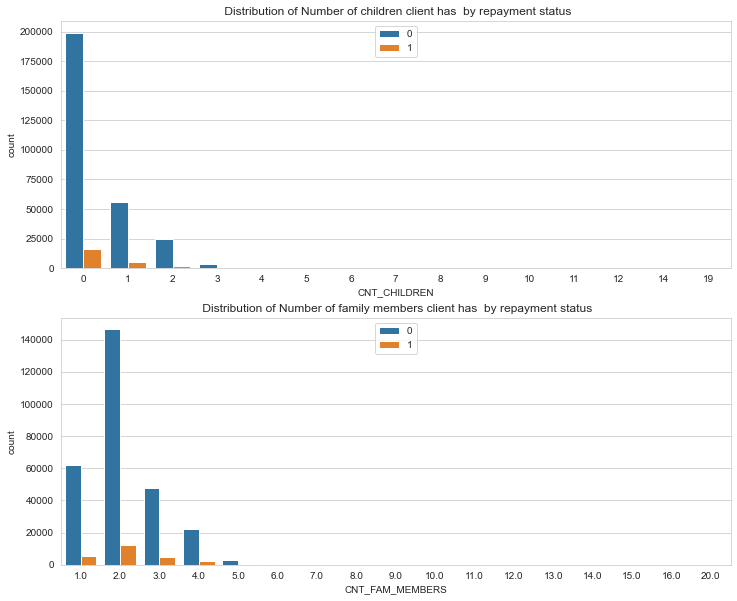

In [106]:
fig = plt.figure(figsize=(12,10))
plt.subplot(211)
sns.countplot(application_data["CNT_CHILDREN"],hue=application_data["TARGET"])
plt.legend(loc="upper center")
plt.title(" Distribution of Number of children client has  by repayment status")
plt.subplot(212)
sns.countplot(application_data["CNT_FAM_MEMBERS"],hue=application_data["TARGET"])
plt.legend(loc="upper center")
plt.title(" Distribution of Number of family members client has  by repayment status")

- Distribution of contract type, gender, own car, own house with respect to Repayment status(Target variable)

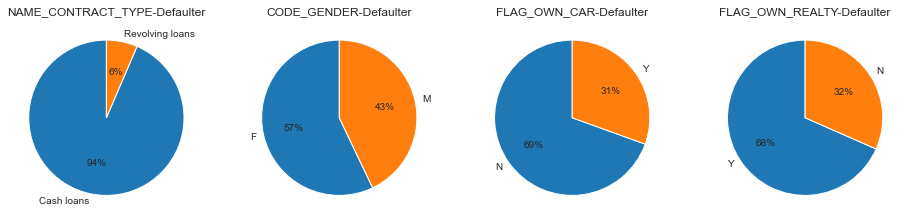

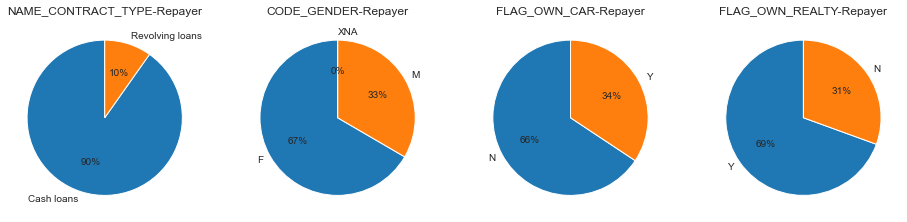

In [107]:
default = application_data[application_data["TARGET"]==1][[ 'NAME_CONTRACT_TYPE', 'CODE_GENDER','FLAG_OWN_CAR', 'FLAG_OWN_REALTY']]
non_default = application_data[application_data["TARGET"]==0][[ 'NAME_CONTRACT_TYPE', 'CODE_GENDER','FLAG_OWN_CAR', 'FLAG_OWN_REALTY']]

d_cols = ['NAME_CONTRACT_TYPE', 'CODE_GENDER','FLAG_OWN_CAR', 'FLAG_OWN_REALTY']
d_length = len(d_cols)

fig = plt.figure(figsize=(16,4))
for i,j in itertools.zip_longest(d_cols,range(d_length)):
    plt.subplot(1,4,j+1)
    default[i].value_counts().plot.pie(autopct = "%1.0f%%",startangle = 90,
                                        wedgeprops={"linewidth":1,"edgecolor":"white"})
 
    plt.ylabel("")
    plt.title(i+"-Defaulter")


fig = plt.figure(figsize=(16,4))
for i,j in itertools.zip_longest(d_cols,range(d_length)):
    plt.subplot(1,4,j+1)
    non_default[i].value_counts().plot.pie(autopct = "%1.0f%%",startangle = 90,
                                           wedgeprops={"linewidth":1,"edgecolor":"white"})

    plt.ylabel("")
    plt.title(i+"-Repayer")

- As per Pie plot we observed following:
    - Percentage of males is 10% more in defaults than non defaulters.

    - Percentage of Cash Loans is 4% more in defaults than Revolving Loans.

- Distribution of amountwise data

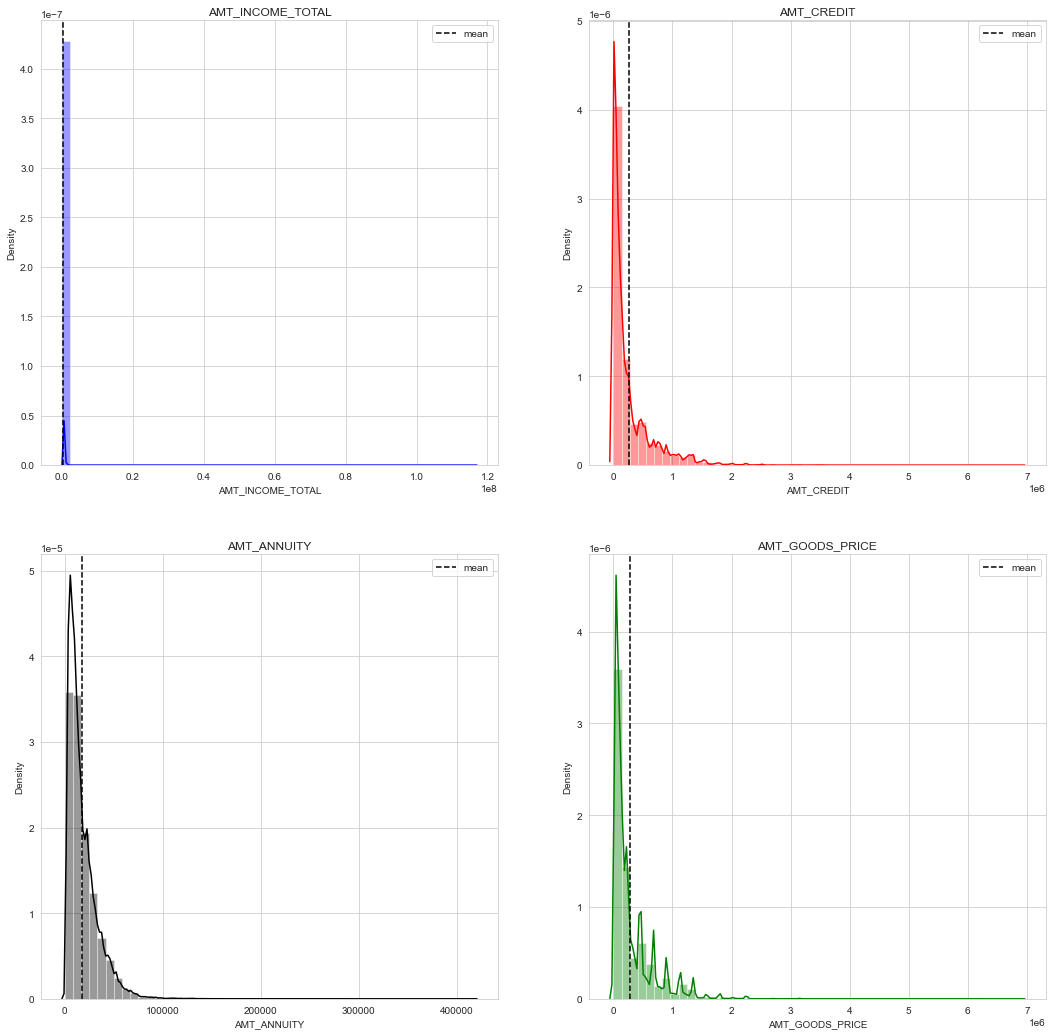

In [108]:
cols = [ 'AMT_INCOME_TOTAL', 'AMT_CREDIT','AMT_ANNUITY', 'AMT_GOODS_PRICE']
length = len(cols)
cs = ["b","r","k","g"]

ax = plt.figure(figsize=(18,18))
for i,j,k in itertools.zip_longest(cols,range(length),cs):
    plt.subplot(2,2,j+1)
    sns.distplot(data[data[i].notnull()][i],color=k)
    plt.axvline(data[i].mean(),label = "mean",linestyle="dashed",color="k")
    plt.legend(loc="best")
    plt.title(i)
    plt.subplots_adjust(hspace = .2)

- Comparing between defaulters and non - defaulters

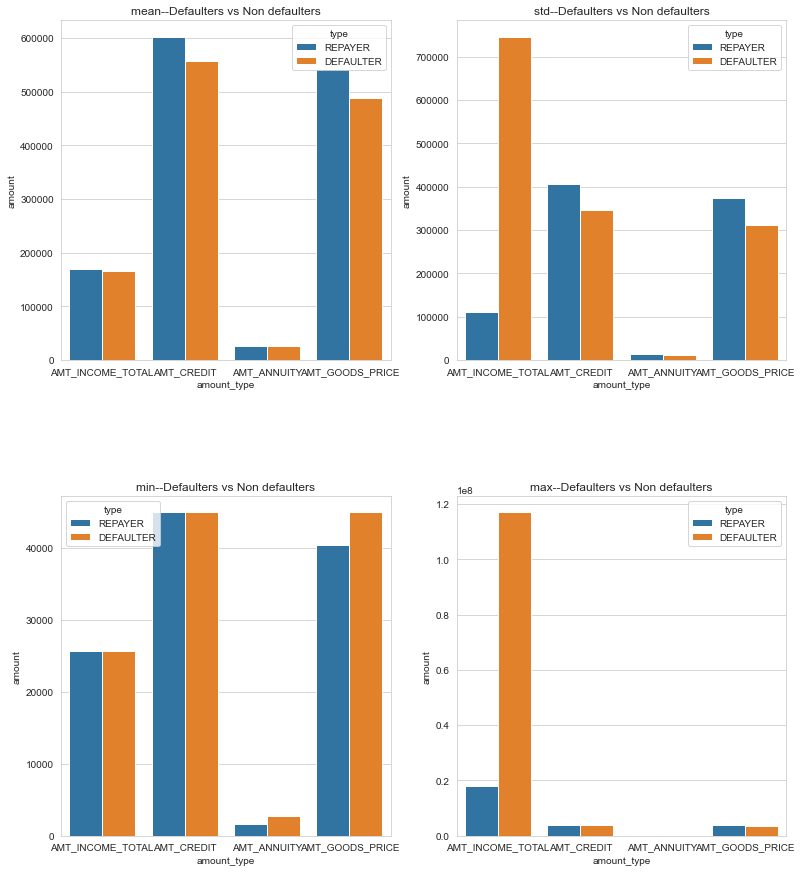

In [109]:
df = application_data.groupby("TARGET")[cols].describe().transpose().reset_index()
df = df[df["level_1"].isin([ 'mean', 'std', 'min', 'max'])] 
df_x = df[["level_0","level_1",0]]
df_y = df[["level_0","level_1",1]]
df_x = df_x.rename(columns={'level_0':"amount_type", 'level_1':"statistic", 0:"amount"})
df_x["type"] = "REPAYER"
df_y = df_y.rename(columns={'level_0':"amount_type", 'level_1':"statistic", 1:"amount"})
df_y["type"] = "DEFAULTER"
df_new = pd.concat([df_x,df_y],axis = 0)

stat = df_new["statistic"].unique().tolist()
length = len(stat)

plt.figure(figsize=(13,15))

for i,j in itertools.zip_longest(stat,range(length)):
    plt.subplot(2,2,j+1)
    fig = sns.barplot(df_new[df_new["statistic"] == i]["amount_type"],df_new[df_new["statistic"] == i]["amount"],
                hue=df_new[df_new["statistic"] == i]["type"])
    plt.title(i + "--Defaulters vs Non defaulters")
    plt.subplots_adjust(hspace = .4)

- As per barplot we found as follows:

1 . Average income of clients who default and who do not are almost same.

2 . Standard deviation in income of client who default is very high compared to who do not default.

3 . Clients who default also has maximum income earnings.

Average Income, credit,annuity & goods_price by gender

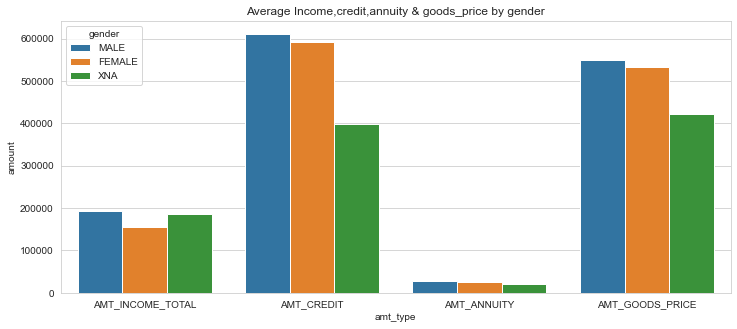

In [110]:
cols = [ 'AMT_INCOME_TOTAL', 'AMT_CREDIT','AMT_ANNUITY', 'AMT_GOODS_PRICE']

df1 = data.groupby("CODE_GENDER")[cols].mean().transpose().reset_index()

df_f   = df1[["index","F"]]
df_f   = df_f.rename(columns={'index':"amt_type", 'F':"amount"})
df_f["gender"] = "FEMALE"
df_m   = df1[["index","M"]]
df_m   = df_m.rename(columns={'index':"amt_type", 'M':"amount"})
df_m["gender"] = "MALE"
df_xna = df1[["index","XNA"]]
df_xna = df_xna.rename(columns={'index':"amt_type", 'XNA':"amount"})
df_xna["gender"] = "XNA"

df_gen = pd.concat([df_m,df_f,df_xna],axis=0)

plt.figure(figsize=(12,5))
ax = sns.barplot("amt_type","amount",data=df_gen,hue="gender")
plt.title("Average Income,credit,annuity & goods_price by gender")
plt.show()

Scatter plot between credit amount and annuity amount

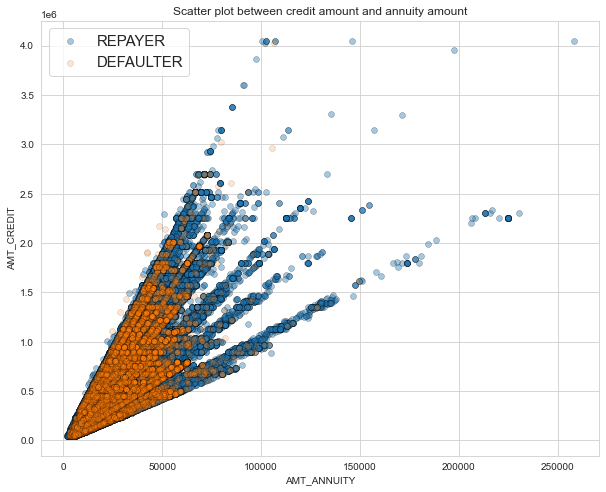

In [111]:
fig = plt.figure(figsize=(10,8))
plt.scatter(application_data[application_data["TARGET"]==0]['AMT_ANNUITY'],application_data[application_data["TARGET"]==0]['AMT_CREDIT'],s=35,
            alpha=.4,label="REPAYER",linewidth=.5,edgecolor="k")
plt.scatter(application_data[application_data["TARGET"]==1]['AMT_ANNUITY'],application_data[application_data["TARGET"]==1]['AMT_CREDIT'],s=35,
            alpha=.2,label="DEFAULTER",linewidth=.5,edgecolor="k")
plt.legend(loc="best",prop={"size":15})
plt.xlabel("AMT_ANNUITY")
plt.ylabel("AMT_CREDIT")
plt.title("Scatter plot between credit amount and annuity amount")
plt.show()

- Pair Plot between amount variables

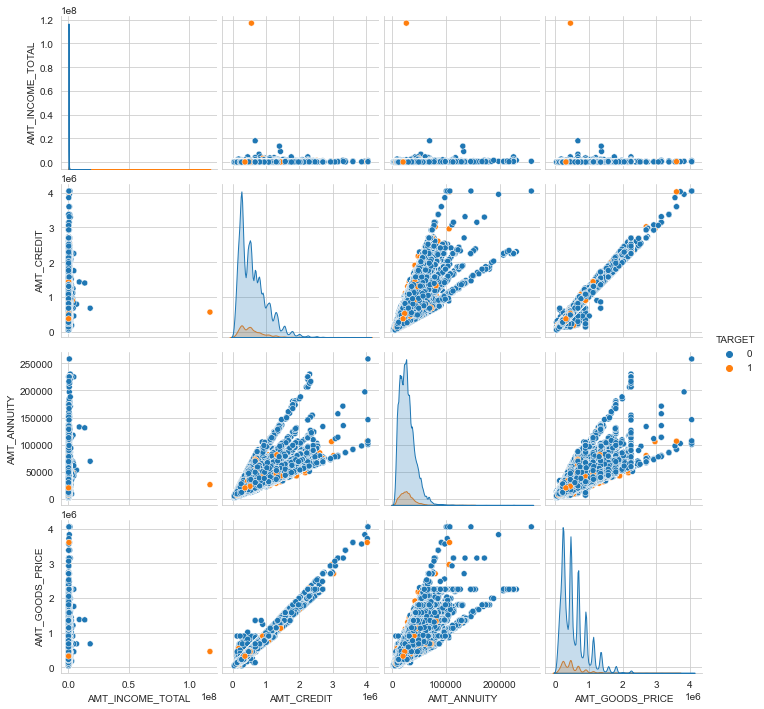

In [112]:
amt = application_data[[ 'AMT_INCOME_TOTAL','AMT_CREDIT',
                         'AMT_ANNUITY', 'AMT_GOODS_PRICE',"TARGET"]]
amt = amt[(amt["AMT_GOODS_PRICE"].notnull()) & (amt["AMT_ANNUITY"].notnull())]
sns.pairplot(amt,hue="TARGET")
plt.show()

- Suite type Distribution

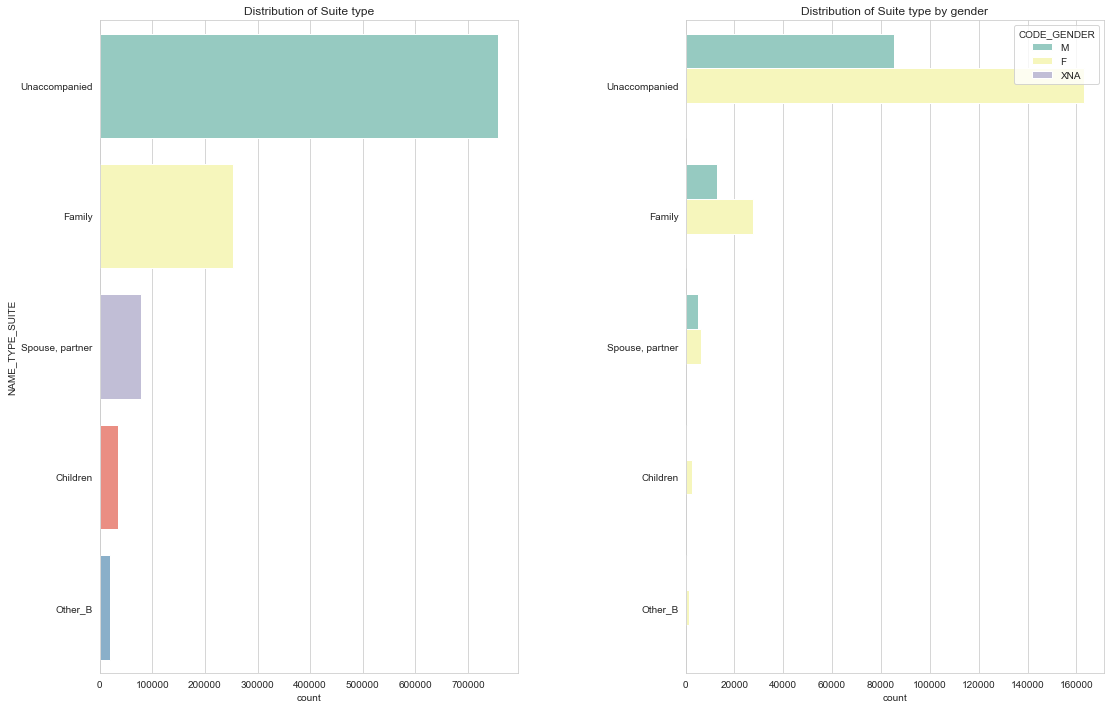

In [113]:
plt.figure(figsize=(18,12))
plt.subplot(121)
sns.countplot(y=data["NAME_TYPE_SUITE"],
              palette="Set3",
              order=data["NAME_TYPE_SUITE"].value_counts().index[:5])
plt.title("Distribution of Suite type")

plt.subplot(122)
sns.countplot(y=data["NAME_TYPE_SUITE"],
              hue=data["CODE_GENDER"],palette="Set3",
              order=data["NAME_TYPE_SUITE"].value_counts().index[:5])
plt.ylabel("")
plt.title("Distribution of Suite type by gender")
plt.subplots_adjust(wspace = .4)

- Client income type Distribution

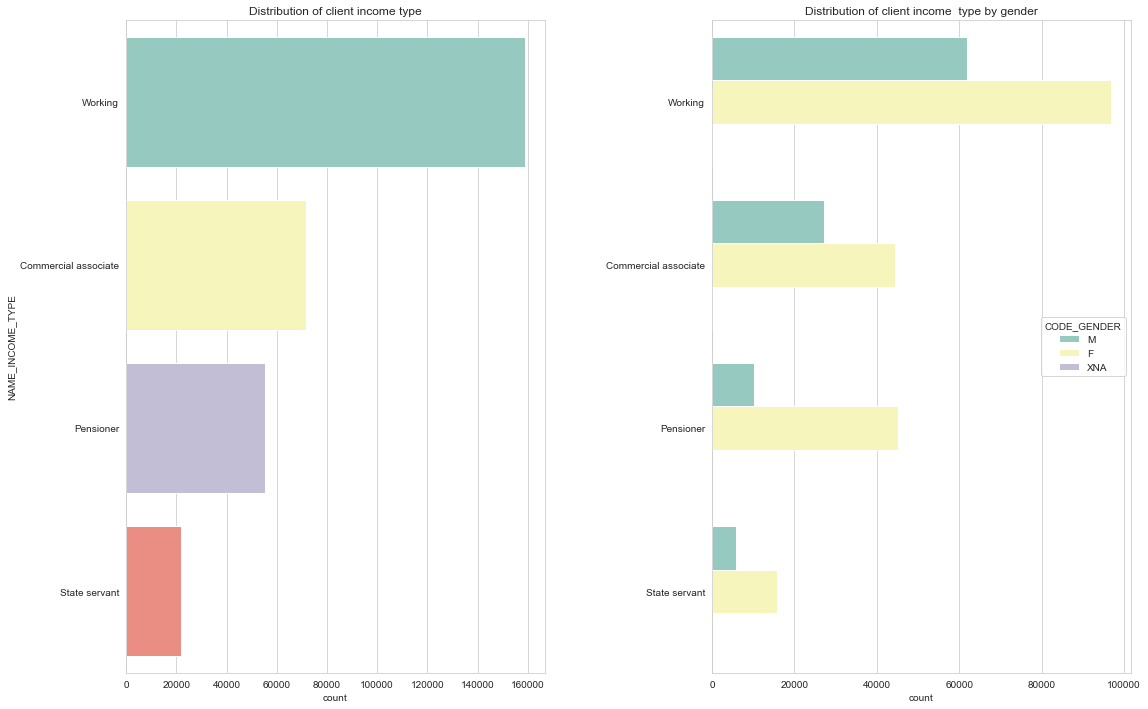

In [114]:
plt.figure(figsize=(18,12))
plt.subplot(121)
sns.countplot(y=data["NAME_INCOME_TYPE"],
              palette="Set3",
              order=data["NAME_INCOME_TYPE"].value_counts().index[:4])
plt.title("Distribution of client income type")

plt.subplot(122)
sns.countplot(y=data["NAME_INCOME_TYPE"],
              hue=data["CODE_GENDER"],
              palette="Set3",
              order=data["NAME_INCOME_TYPE"].value_counts().index[:4])
plt.ylabel("")
plt.title("Distribution of client income  type by gender")
plt.subplots_adjust(wspace = .4)

- Education type Distribution by loan repayment status

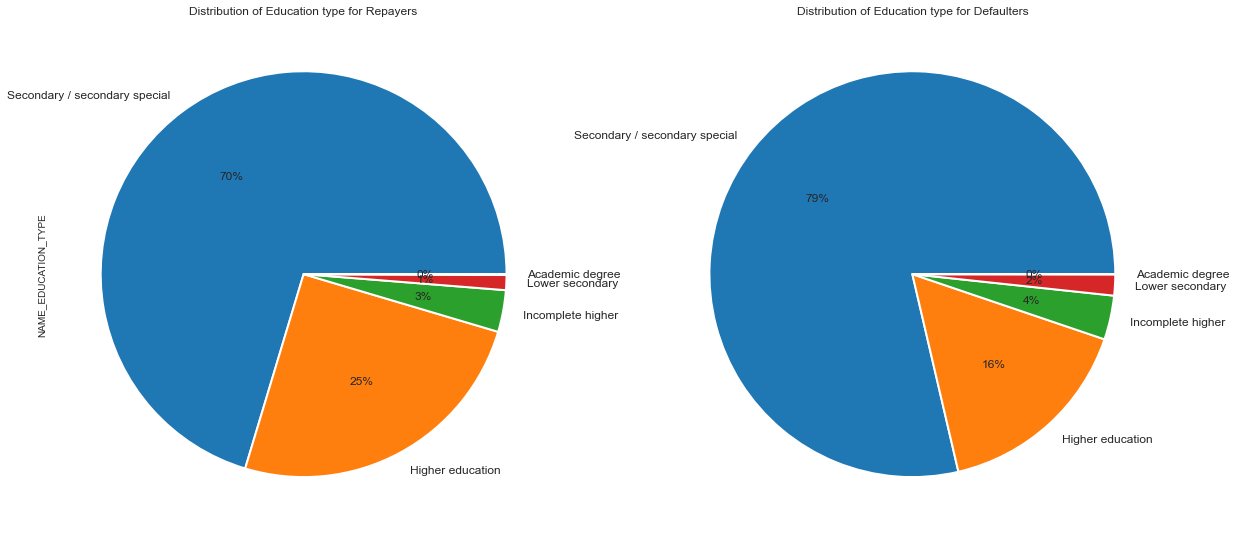

In [115]:
plt.figure(figsize=(20,20))
plt.subplot(121)
application_data[application_data["TARGET"]==0]["NAME_EDUCATION_TYPE"].value_counts().plot.pie(fontsize=12,autopct = "%1.0f%%",
                                                                                                 
                                              wedgeprops={"linewidth":2,"edgecolor":"white"})

plt.title("Distribution of Education type for Repayers")

plt.subplot(122)
application_data[application_data["TARGET"]==1]["NAME_EDUCATION_TYPE"].value_counts().plot.pie(fontsize=12,autopct = "%1.0f%%",
                                                                                                 
                                              wedgeprops={"linewidth":2,"edgecolor":"white"})

plt.title("Distribution of Education type for Defaulters")
plt.ylabel("")
plt.show()

- As per above Pie chart we found that defaulter have lesser higher education by 9 % compared to non defaulter clients.

- Average earnings by different professions and education types

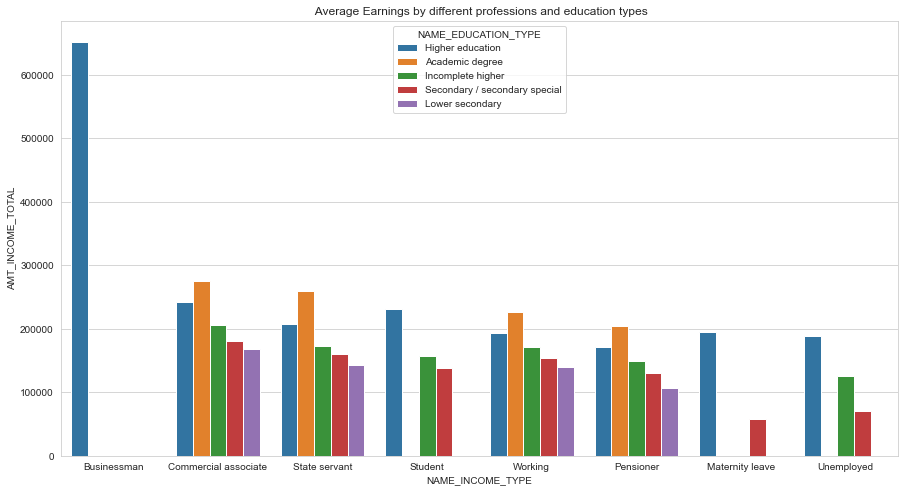

In [118]:
edu = data.groupby(['NAME_EDUCATION_TYPE','NAME_INCOME_TYPE'])['AMT_INCOME_TOTAL'].mean().reset_index().sort_values(by='AMT_INCOME_TOTAL',ascending=False)
fig = plt.figure(figsize=(15,8))
ax = sns.barplot('NAME_INCOME_TYPE','AMT_INCOME_TOTAL',data=edu,hue='NAME_EDUCATION_TYPE')

plt.title(" Average Earnings by different professions and education types")
plt.show()

- Education Distribution by loan repayment status

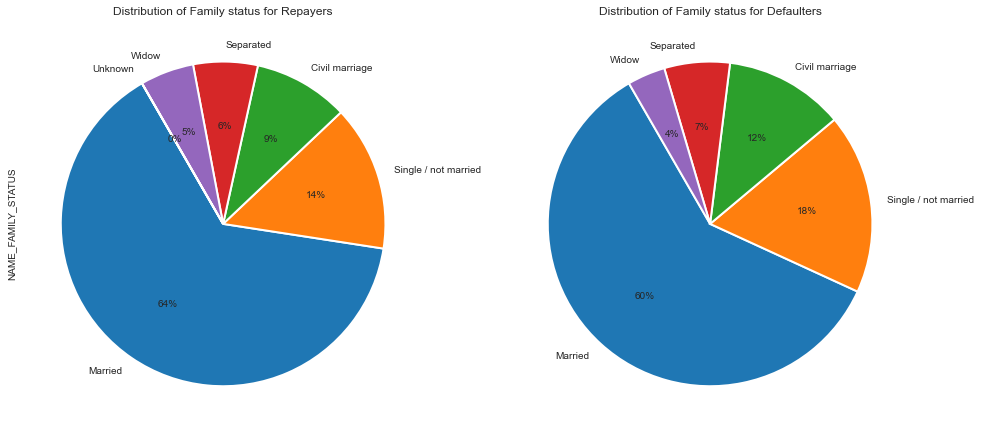

In [120]:
plt.figure(figsize=(16,8))
plt.subplot(121)
application_data[application_data["TARGET"]==0]["NAME_FAMILY_STATUS"].value_counts().plot.pie(autopct = "%1.0f%%",
                                                             startangle=120,
                                              wedgeprops={"linewidth":2,"edgecolor":"white"})

plt.title("Distribution of Family status for Repayers")

plt.subplot(122)
application_data[application_data["TARGET"]==1]["NAME_FAMILY_STATUS"].value_counts().plot.pie(autopct = "%1.0f%%",
                                                    startangle=120,
                                              wedgeprops={"linewidth":2,"edgecolor":"white"})


plt.title("Distribution of Family status for Defaulters")
plt.ylabel("")
plt.show()

- As per Pie chart single people are more in defaulters than non defaulters.

- Housing Distribution by loan repayment status

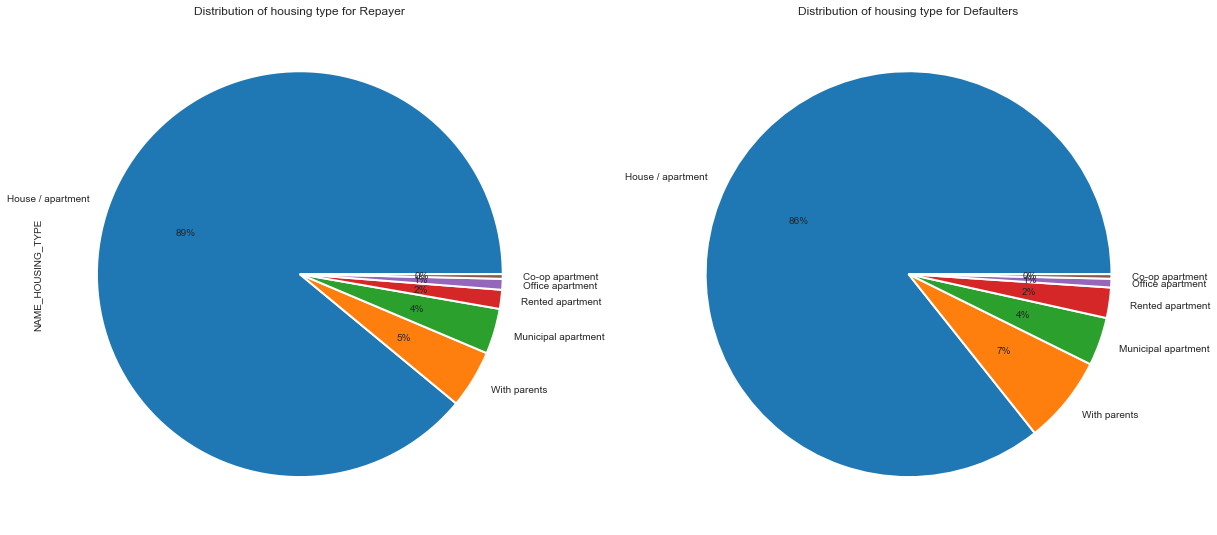

In [123]:
plt.figure(figsize=(20,20))
plt.subplot(121)
application_data[application_data["TARGET"]==0]["NAME_HOUSING_TYPE"].value_counts().plot.pie(autopct = "%1.0f%%",fontsize=10,
                                                             
                                              wedgeprops={"linewidth":2,"edgecolor":"white"})

plt.title("Distribution of housing type for Repayer")

plt.subplot(122)
application_data[application_data["TARGET"]==1]["NAME_HOUSING_TYPE"].value_counts().plot.pie(autopct = "%1.0f%%",fontsize=10,
                                                    
                                              wedgeprops={"linewidth":2,"edgecolor":"white"})


plt.title("Distribution of housing type for Defaulters")
plt.ylabel("")
plt.show()

- Above Pie chart shows Distribution normalized population of region where client lives by loan repayment status

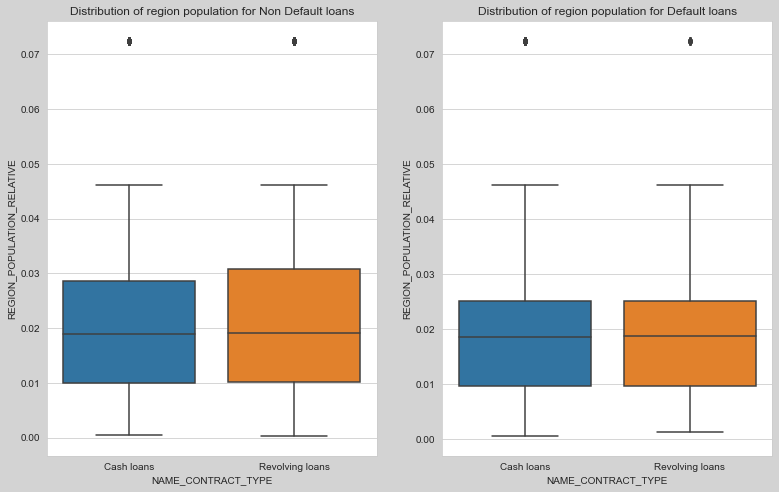

In [126]:
fig = plt.figure(figsize=(13,8))

plt.subplot(121)
sns.boxplot(y=application_data[application_data["TARGET"]==0]["REGION_POPULATION_RELATIVE"]
               ,x=application_data[application_data["TARGET"]==0]["NAME_CONTRACT_TYPE"])
plt.title("Distribution of region population for Non Default loans")
plt.subplot(122)
sns.boxplot(y = application_data[application_data["TARGET"]==1]["REGION_POPULATION_RELATIVE"]
               ,x=application_data[application_data["TARGET"]==1]["NAME_CONTRACT_TYPE"]
               )
plt.title("Distribution of region population for Default loans")

plt.subplots_adjust(wspace = .2)
fig.set_facecolor("lightgrey")

- As per Boxplot it observed that High population density regions people are less likely to default on loans.

- Age of Client


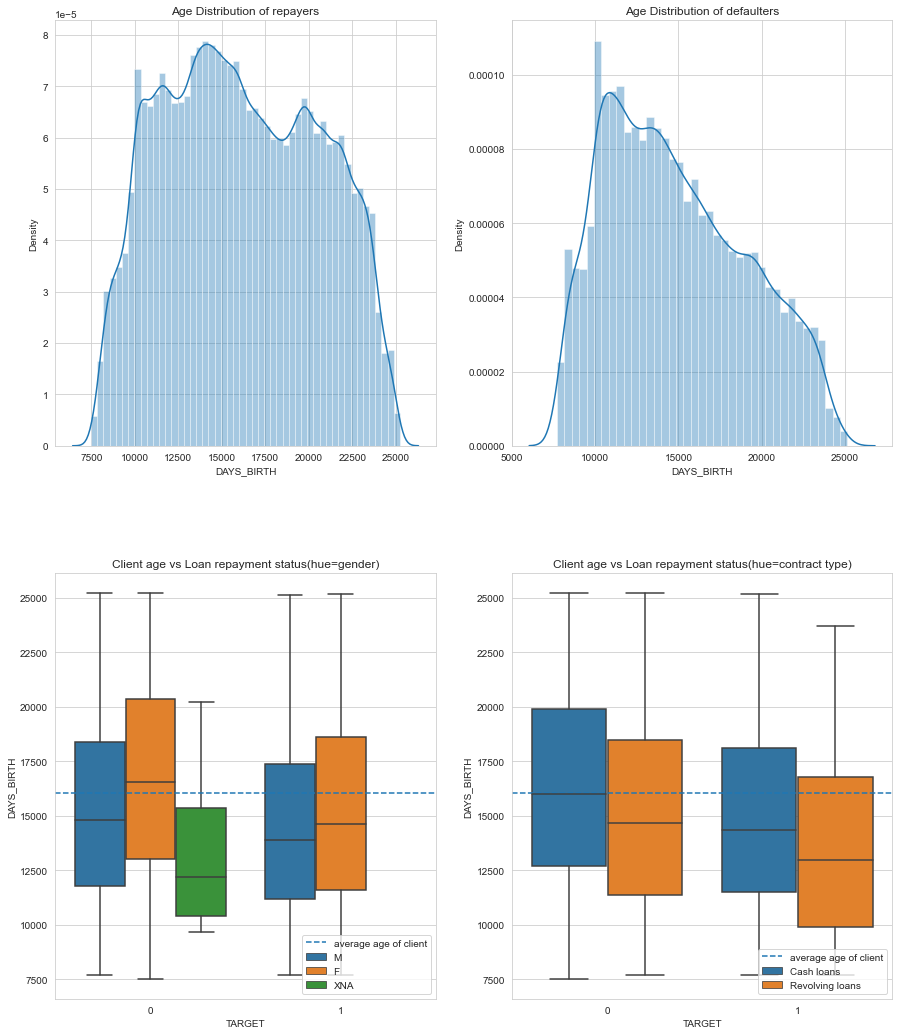

In [129]:
fig = plt.figure(figsize=(15,18))

plt.subplot(221)
sns.distplot(application_data[application_data["TARGET"]==0]["DAYS_BIRTH"])
plt.title("Age Distribution of repayers")

plt.subplot(222)
sns.distplot(application_data[application_data["TARGET"]==1]["DAYS_BIRTH"])
plt.title("Age Distribution of defaulters")

plt.subplot(223)
sns.boxplot(application_data["TARGET"],application_data["DAYS_BIRTH"],hue=application_data["CODE_GENDER"])
plt.axhline(application_data["DAYS_BIRTH"].mean(),linestyle="dashed", label ="average age of client")
plt.legend(loc="lower right")
plt.title("Client age vs Loan repayment status(hue=gender)")

plt.subplot(224)
sns.boxplot(application_data["TARGET"],application_data["DAYS_BIRTH"],hue=application_data["NAME_CONTRACT_TYPE"])
plt.axhline(application_data["DAYS_BIRTH"].mean(),linestyle="dashed",label ="average age of client")
plt.legend(loc="lower right")
plt.title("Client age vs Loan repayment status(hue=contract type)")

plt.subplots_adjust(wspace = .2,hspace = .3)

- As per above barplot we observed as follow:
    - Average clients age is comparatively less in non repayers than repayers in every aspect.
    - Younger people tend to default more than elder people.

- Days employed Distribution for target variable.

Text(0.5, 1.0, 'days employed distribution of defaulters')

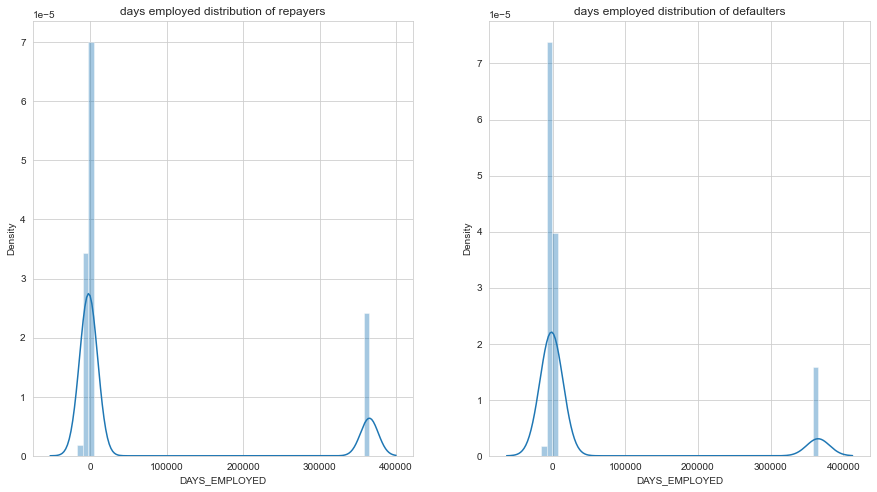

In [132]:
fig = plt.figure(figsize=(15,8))

plt.subplot(121)
sns.distplot(application_data[application_data["TARGET"]==0]["DAYS_EMPLOYED"])
plt.title("days employed distribution of repayers")

plt.subplot(122)
sns.distplot(application_data[application_data["TARGET"]==1]["DAYS_EMPLOYED"])
plt.title("days employed distribution of defaulters")

- Registration days Distribution for target variable

Text(0.5, 1.0, 'registration days distribution of defaulter')

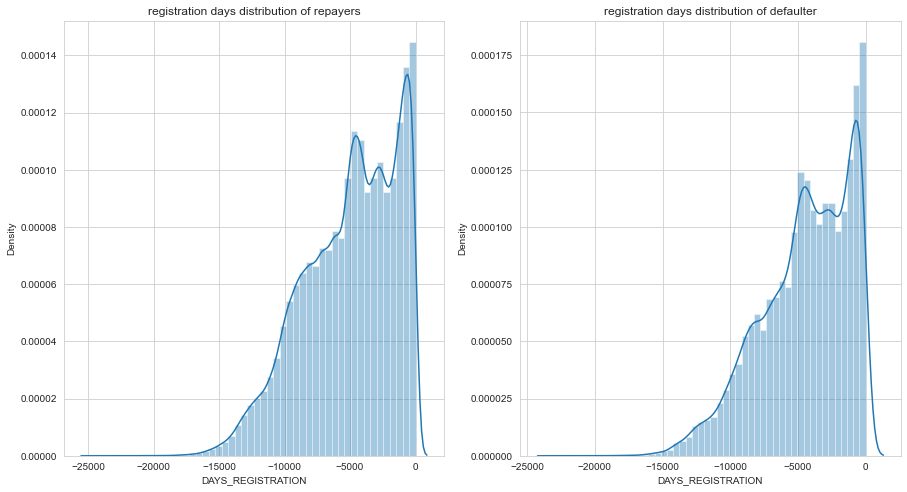

In [175]:
fig = plt.figure(figsize=(15,8))

plt.subplot(121)
sns.distplot(application_data[application_data["TARGET"]==0]["DAYS_REGISTRATION"])
plt.title("registration days distribution of repayers")

plt.subplot(122)
sns.distplot(application_data[application_data["TARGET"]==1]["DAYS_REGISTRATION"])
plt.title("registration days distribution of defaulter")

fig.set_facecolor("ghostwhite")

In [ ]:
Distribution in contact information provided by client
FLAG_MOBIL - Did client provide mobile phone (1=YES, 0=NO)

FLAG_EMP_PHONE - Did client provide work phone (1=YES, 0=NO)

FLAG_WORK_PHONE - Did client provide home phone (1=YES, 0=NO)

FLAG_CONT_MOBILE - Was mobile phone reachable (1=YES, 0=NO)

FLAG_PHONE - Did client provide home phone (1=YES, 0=NO)

FLAG_EMAIL - Did client provide email (1=YES, 0=NO)

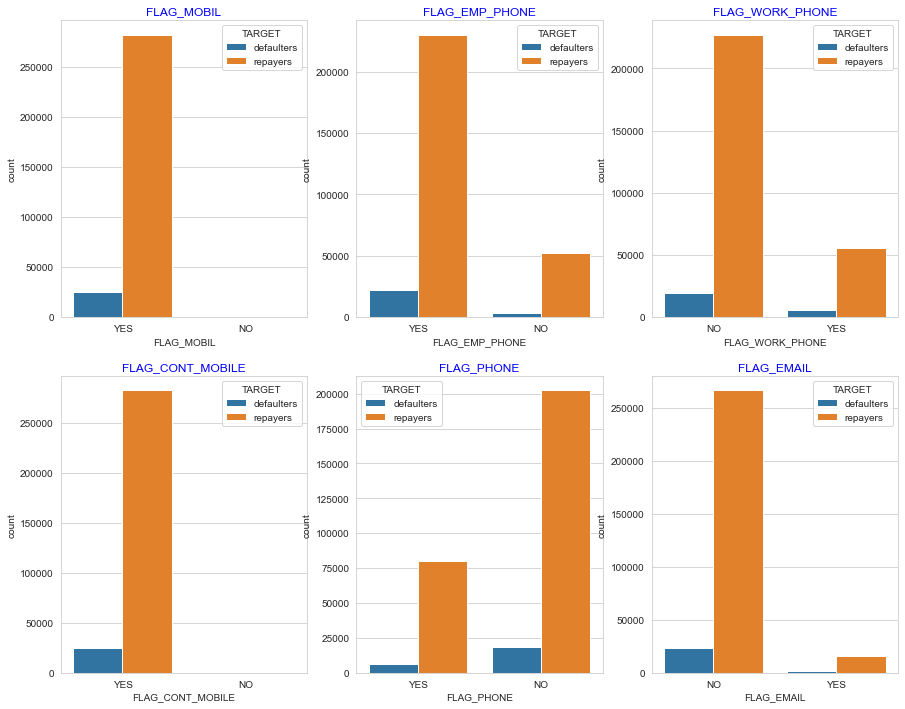

In [176]:
x   = application_data[['FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE',
       'FLAG_PHONE', 'FLAG_EMAIL',"TARGET"]]
x["TARGET"] = x["TARGET"].replace({0:"repayers",1:"defaulters"})
x  = x.replace({1:"YES",0:"NO"})

cols = ['FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE',
       'FLAG_PHONE', 'FLAG_EMAIL']
length = len(cols)

fig = plt.figure(figsize=(15,12))


for i,j in itertools.zip_longest(cols,range(length)):
    plt.subplot(2,3,j+1)
    sns.countplot(x[i],hue=x["TARGET"])
    plt.title(i,color="b")

-  Registration days Distribution for target variable.

Text(0, 0.5, '')

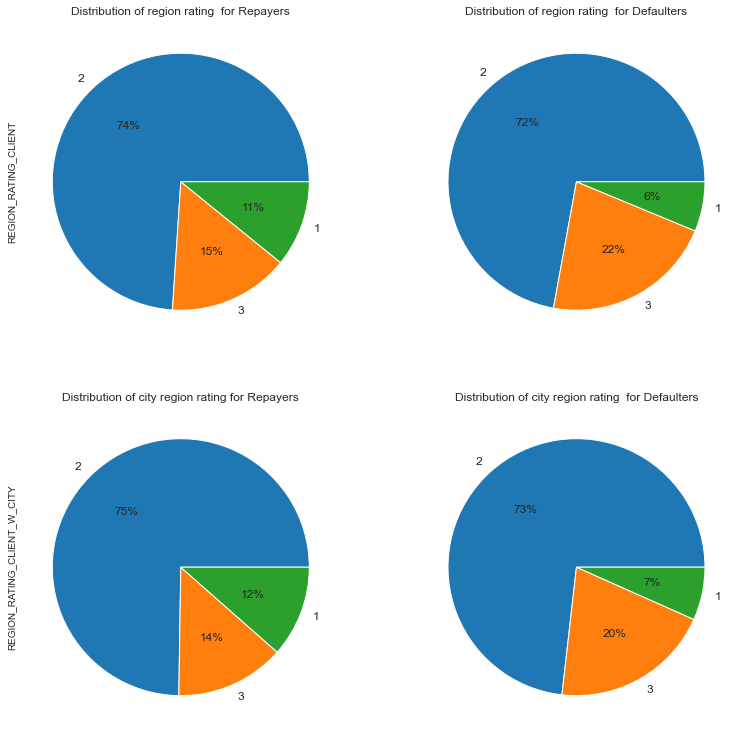

In [180]:
fig = plt.figure(figsize=(13,13))
plt.subplot(221)
application_data[application_data["TARGET"]==0]["REGION_RATING_CLIENT"].value_counts().plot.pie(autopct = "%1.0f%%",fontsize=12,
                                                            
                                              wedgeprops={"linewidth":1,"edgecolor":"white"})

plt.title("Distribution of region rating  for Repayers")

plt.subplot(222)
application_data[application_data["TARGET"]==1]["REGION_RATING_CLIENT"].value_counts().plot.pie(autopct = "%1.0f%%",fontsize=12,
                                                   
                                              wedgeprops={"linewidth":1,"edgecolor":"white"})


plt.title("Distribution of region rating  for Defaulters")
plt.ylabel("")

plt.subplot(223)
application_data[application_data["TARGET"]==0]["REGION_RATING_CLIENT_W_CITY"].value_counts().plot.pie(autopct = "%1.0f%%",fontsize=12,

                                              wedgeprops={"linewidth":1,"edgecolor":"white"})

plt.title("Distribution of city region rating for Repayers")

plt.subplot(224)
application_data[application_data["TARGET"]==1]["REGION_RATING_CLIENT_W_CITY"].value_counts().plot.pie(autopct = "%1.0f%%",fontsize=12,

                                              wedgeprops={"linewidth":1,"edgecolor":"white"})


plt.title("Distribution of city region rating  for Defaulters")
plt.ylabel("")

- As per Pie Plot we found as follows: 

    - Percentage of defaulters are less in 1-rated regions compared to repayers.

    - Percentage of defaulters are more in 3-rated regions compared to repayers.

- Defaulters vs Repayers (Peak days and hours for applying loans)

Text(0.5, 1.0, 'Peak hours for applying loans (defaulters vs repayers)')

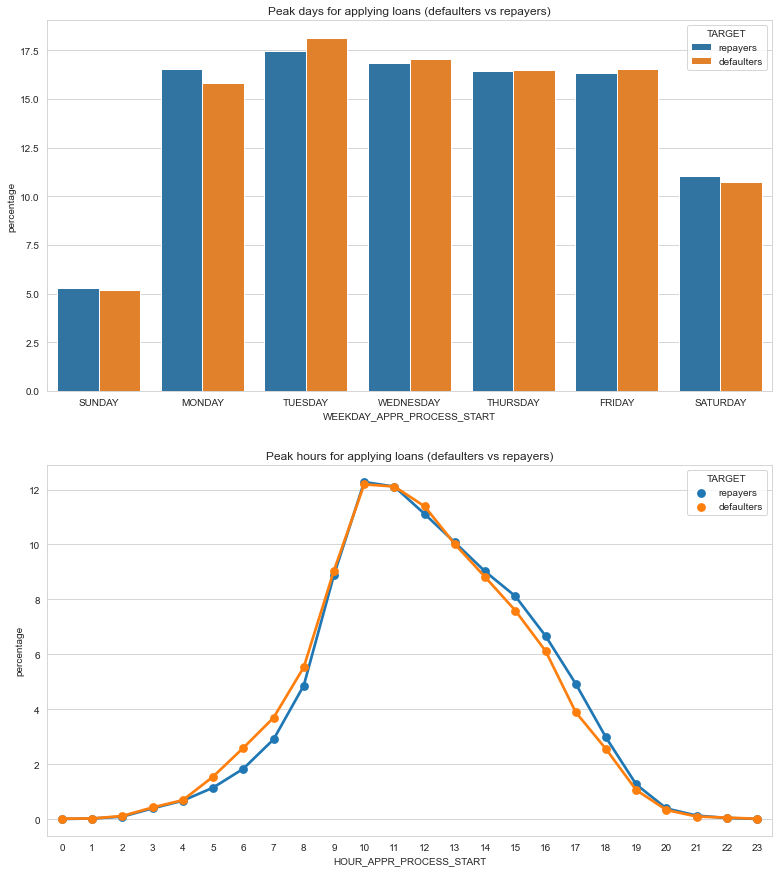

In [182]:
day = application_data.groupby("TARGET").agg({"WEEKDAY_APPR_PROCESS_START":"value_counts"})
day = day.rename(columns={"WEEKDAY_APPR_PROCESS_START":"value_counts"})
day = day.reset_index()
day_0 = day[:7]
day_1 = day[7:]
day_0["percentage"] = day_0["value_counts"]*100/day_0["value_counts"].sum()
day_1["percentage"] = day_1["value_counts"]*100/day_1["value_counts"].sum()
days = pd.concat([day_0,day_1],axis=0)
days["TARGET"] = days.replace({1:"defaulters",0:"repayers"})

fig = plt.figure(figsize=(13,15))
plt.subplot(211)
order = ['SUNDAY', 'MONDAY','TUESDAY', 'WEDNESDAY','THURSDAY', 'FRIDAY', 'SATURDAY']
ax= sns.barplot("WEEKDAY_APPR_PROCESS_START","percentage",data=days,
                hue="TARGET",order=order)

ax.set_title("Peak days for applying loans (defaulters vs repayers)")

hr = application_data.groupby("TARGET").agg({"HOUR_APPR_PROCESS_START":"value_counts"})
hr = hr.rename(columns={"HOUR_APPR_PROCESS_START":"value_counts"}).reset_index()
hr_0 = hr[hr["TARGET"]==0]
hr_1 = hr[hr["TARGET"]==1]
hr_0["percentage"] = hr_0["value_counts"]*100/hr_0["value_counts"].sum()
hr_1["percentage"] = hr_1["value_counts"]*100/hr_1["value_counts"].sum()
hrs = pd.concat([hr_0,hr_1],axis=0)
hrs["TARGET"] = hrs["TARGET"].replace({1:"defaulters",0:"repayers"})
hrs = hrs.sort_values(by="HOUR_APPR_PROCESS_START",ascending=True)

plt.subplot(212)
ax1 = sns.pointplot("HOUR_APPR_PROCESS_START","percentage",
                    data=hrs,hue="TARGET")

ax1.set_title("Peak hours for applying loans (defaulters vs repayers)")


- As per bar plot we found as follows:
    
    - Percentage of defaulters on tuesdays applying for loans is greater than that of repayers.

    - Most of defaulters applying for loans is greater from morning 4:0 AM to 9:0 PM.

- Distribution in organization types for repayers and defaulters

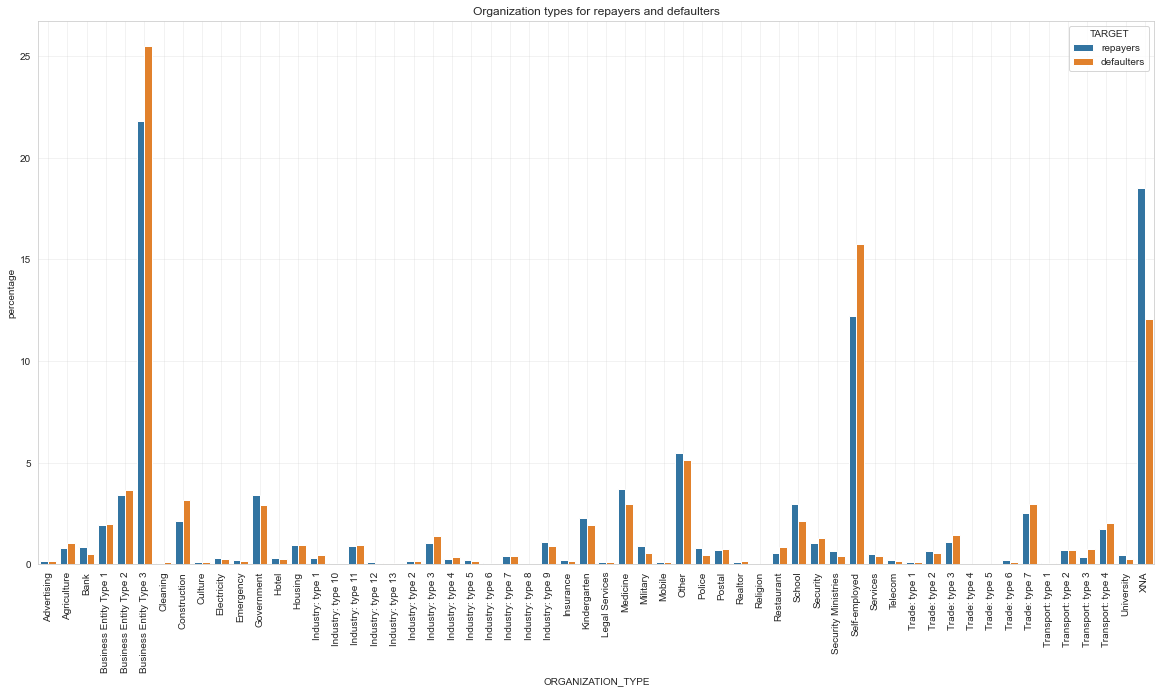

In [189]:
org = application_data.groupby("TARGET").agg({"ORGANIZATION_TYPE":"value_counts"})
org = org.rename(columns = {"ORGANIZATION_TYPE":"value_counts"}).reset_index()
org_0 = org[org["TARGET"] == 0]
org_1 = org[org["TARGET"] == 1]
org_0["percentage"] = org_0["value_counts"]*100/org_0["value_counts"].sum()
org_1["percentage"] = org_1["value_counts"]*100/org_1["value_counts"].sum()

organization = pd.concat([org_0,org_1],axis=0)
organization = organization.sort_values(by="ORGANIZATION_TYPE",ascending=True)

organization["TARGET"] = organization["TARGET"].replace({0:"repayers",1:"defaulters"})

organization
plt.figure(figsize=(20,10))
ax = sns.barplot("ORGANIZATION_TYPE","percentage",
                   data=organization,hue="TARGET")
plt.xticks(rotation=90)
plt.grid(True,alpha=.3)

ax.set_title("Organization types for repayers and defaulters")
plt.show()

- As per bar plot we observed Organizations like Business Entity Type 3, Construction, Self-employed percentage of defaulters are higher than repayers.

- Distribution client's social surroundings with observed and defaulted 30 DPD (days past due)

Text(0.5, 1.0, "Client's social surroundings defaulted on 60 DPD (days past due)")

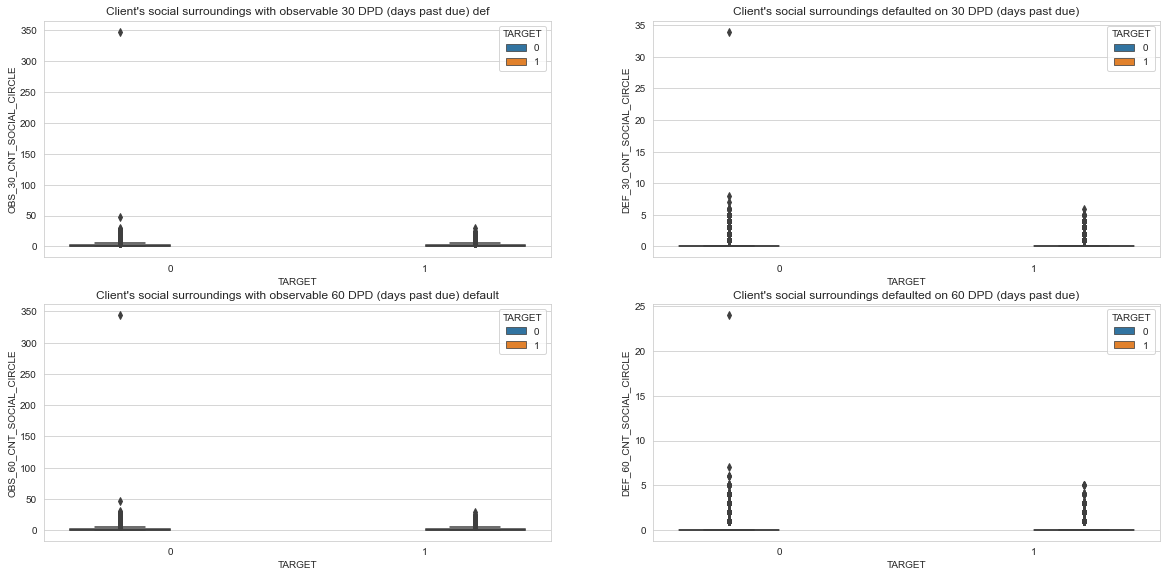

In [190]:
fig = plt.figure(figsize=(20,20))
plt.subplot(421)
sns.boxplot(data=application_data,x='TARGET',y='OBS_30_CNT_SOCIAL_CIRCLE',
            hue="TARGET")
plt.title("Client's social surroundings with observable 30 DPD (days past due) def")
plt.subplot(422)
sns.boxplot(data=application_data,x='TARGET',y='DEF_30_CNT_SOCIAL_CIRCLE',
            hue="TARGET")
plt.title("Client's social surroundings defaulted on 30 DPD (days past due)")
plt.subplot(423)
sns.boxplot(data=application_data,x='TARGET',y='OBS_60_CNT_SOCIAL_CIRCLE',
            hue="TARGET")
plt.title("Client's social surroundings with observable 60 DPD (days past due) default")
plt.subplot(424)
sns.boxplot(data=application_data,x='TARGET',y='DEF_60_CNT_SOCIAL_CIRCLE',
            hue="TARGET")
plt.title("Client's social surroundings defaulted on 60 DPD (days past due)")


- Number of days before application client changed phone.

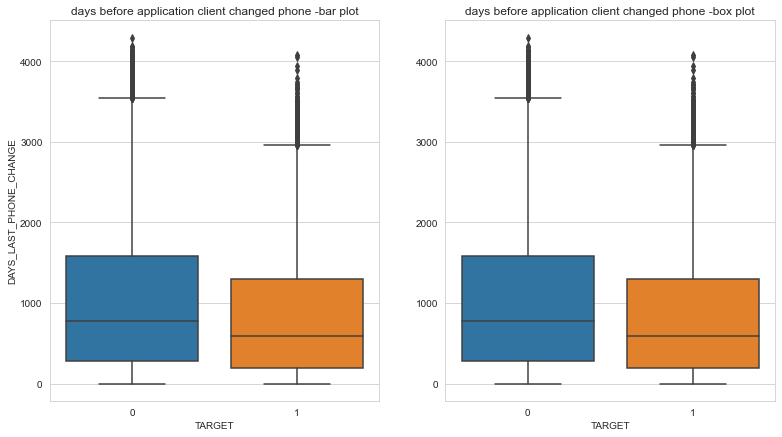

In [192]:
plt.figure(figsize=(13,7))
plt.subplot(121)
ax = sns.boxplot(application_data["TARGET"],
                    application_data["DAYS_LAST_PHONE_CHANGE"])

ax.set_title("days before application client changed phone -bar plot")
plt.subplot(122)
ax1 = sns.boxplot(application_data["TARGET"],
                 application_data["DAYS_LAST_PHONE_CHANGE"])

ax1.set_ylabel("")
ax1.set_title("days before application client changed phone -box plot")
plt.subplots_adjust(wspace = .2)

- As per box plot we found that Average days of defaulters phone change is less than average days of repayers phone change.

- Documents provided by the clients.

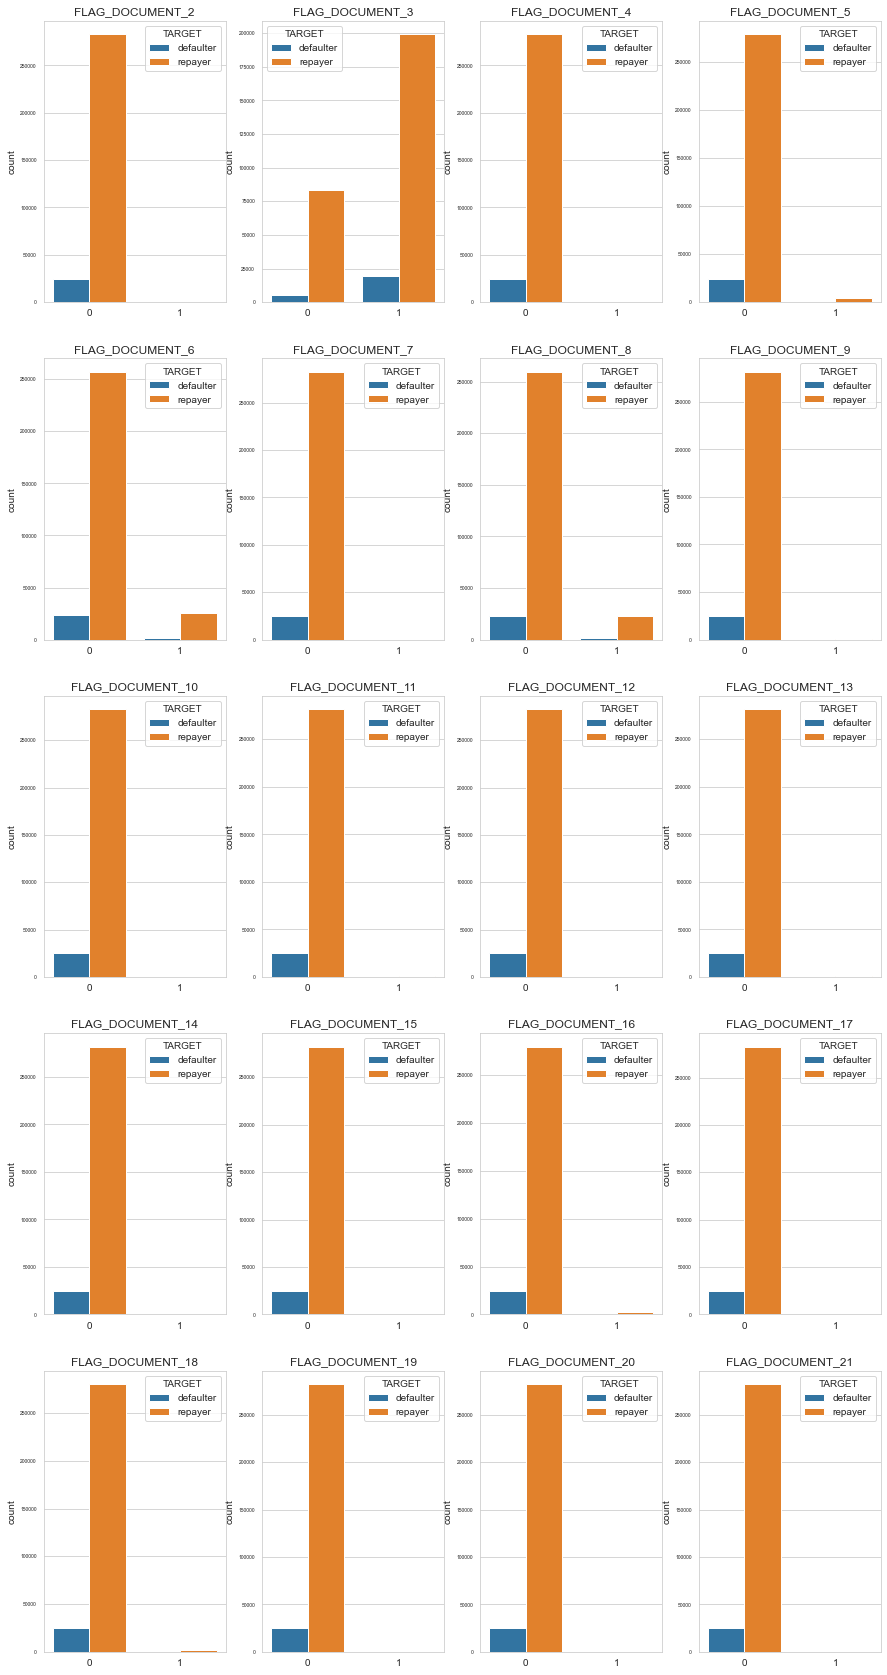

In [193]:
cols = [ 'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3',
       'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6',
       'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9',
       'FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12',
       'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15',
       'FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18',
       'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21']

df_flag = application_data[cols+["TARGET"]]

length = len(cols)

df_flag["TARGET"] = df_flag["TARGET"].replace({1:"defaulter",0:"repayer"})

fig = plt.figure(figsize=(15,30))

for i,j in itertools.zip_longest(cols,range(length)):
    plt.subplot(5,4,j+1)
    ax = sns.countplot(df_flag[i],hue=df_flag["TARGET"])
    plt.yticks(fontsize=5)
    plt.xlabel("")
    plt.title(i)


- Equiries to Credit Bureau about the client before application.

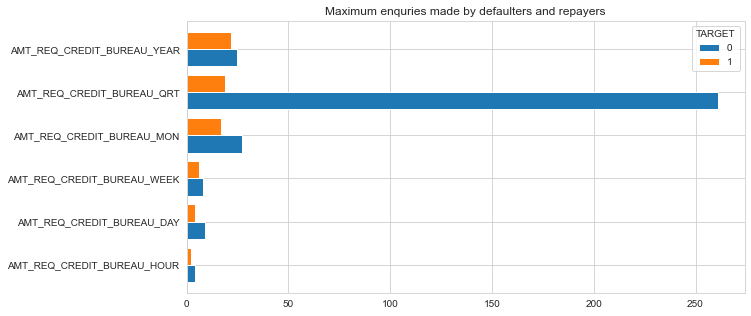

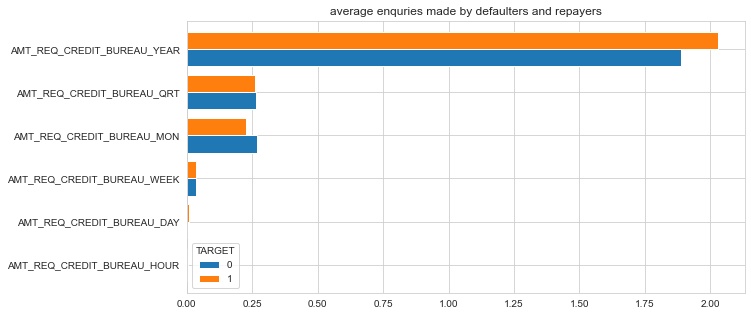

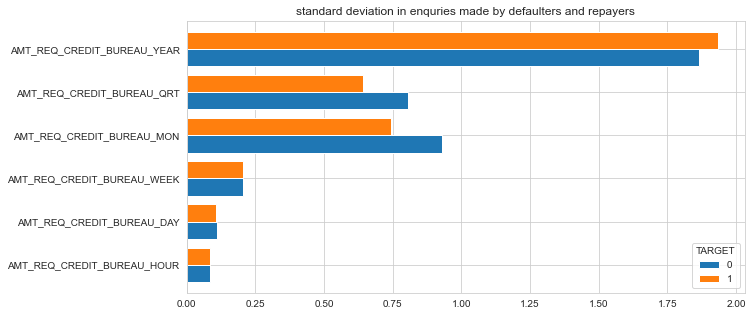

In [141]:
cols = ['AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY',
       'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_MON',
       'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR']
application_data.groupby("TARGET")[cols].max().transpose().plot(kind="barh",
                                                                 figsize=(10,5),width=.8)
plt.title("Maximum enquries made by defaulters and repayers")
application_data.groupby("TARGET")[cols].mean().transpose().plot(kind="barh",
                                                                  figsize=(10,5),width=.8)
plt.title("average enquries made by defaulters and repayers")
application_data.groupby("TARGET")[cols].std().transpose().plot(kind="barh",
                                                                 figsize=(10,5),width=.8)
plt.title("standard deviation in enquries made by defaulters and repayers")
plt.show()

- Previous loan applications with current loan id.

Text(0.5, 1.0, 'Previous loan applications with commom loan id')

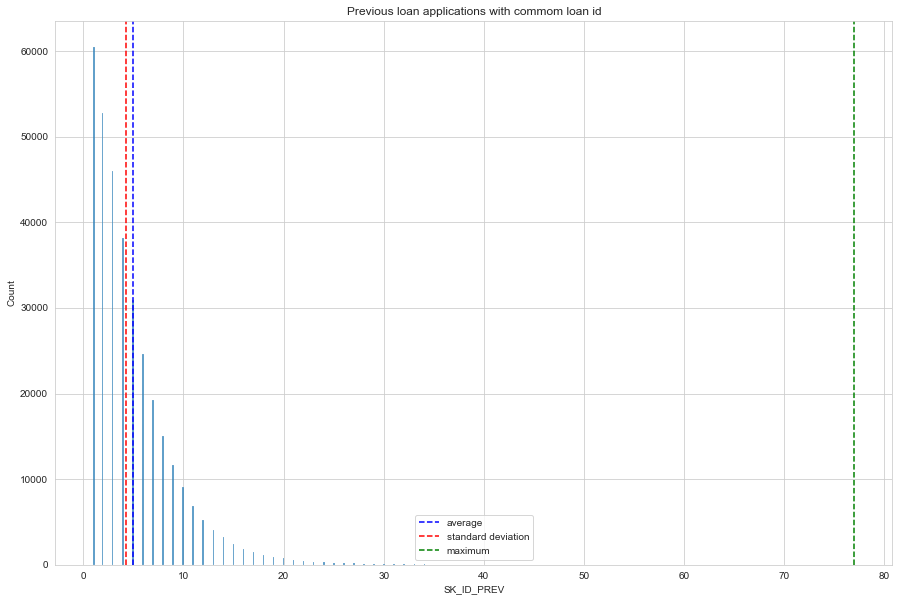

In [199]:
x = previous_application.groupby("SK_ID_CURR")["SK_ID_PREV"].count().reset_index()
plt.figure(figsize=(15,10))
ax = sns.histplot(x["SK_ID_PREV"])
plt.axvline(x["SK_ID_PREV"].mean(),linestyle="dashed", color = 'b',label="average")
plt.axvline(x["SK_ID_PREV"].std(),linestyle="dashed",color = 'r', label="standard deviation")
plt.axvline(x["SK_ID_PREV"].max(),linestyle="dashed", color = 'g', label="maximum")
plt.legend(loc="best")
plt.title("Previous loan applications with commom loan id")

- As per hist plot we found that on an average, previous 4 to 5 loan applicants have common load ids.

- Previous applications of Contract types

In [ ]:
!pip install plotly
!pip install squarify

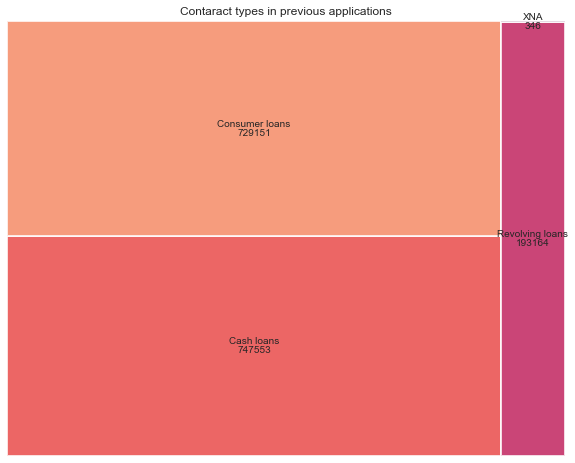

In [201]:
cnts = previous_application["NAME_CONTRACT_TYPE"].value_counts()
import squarify 
plt.figure(figsize=(10,8))
squarify.plot(cnts.values,label=cnts.keys(),value=cnts.values,linewidth=2,alpha=.8)
plt.axis("off")
plt.title("Contaract types in previous applications")
plt.show()

- As per above plot we found that Cash loan applications are maximum followed by consumer loan applications.

- Loan amounts credited and Previous loan amounts applied.

Text(0.5, 1.0, 'Previous loan amounts applied and loan amounts credited.')

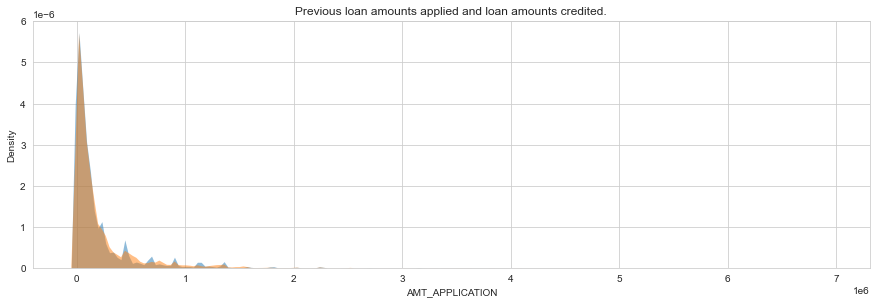

In [211]:
plt.figure(figsize=(15,10))
plt.subplot(211)
ax = sns.kdeplot(data = previous_application["AMT_APPLICATION"],
   fill=True, common_norm=False, palette="crest",
   alpha=.5, linewidth=0)
ax = sns.kdeplot(data = previous_application[previous_application["AMT_CREDIT"].notnull()]["AMT_CREDIT"],
   fill=True, common_norm=False, palette="crest",
   alpha=.5, linewidth=0)

plt.title("Previous loan amounts applied and loan amounts credited.")

Text(0.5, 1.0, 'difference in amount requested by client and amount credited')

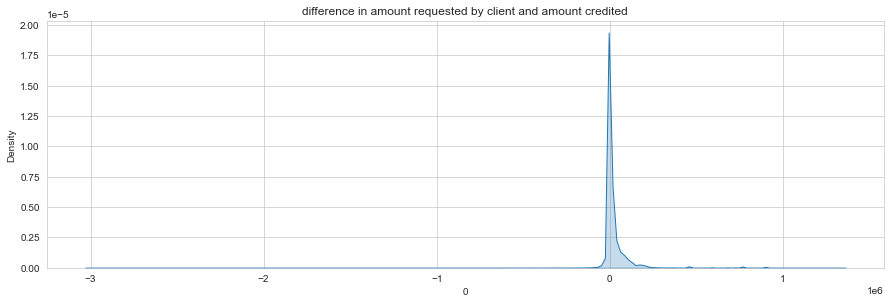

In [212]:
plt.figure(figsize=(15,10))
plt.subplot(212)
diff = (previous_application["AMT_CREDIT"] - previous_application["AMT_APPLICATION"]).reset_index()
diff = diff[diff[0].notnull()]
ax1 = sns.kdeplot(data = diff[0], fill=True, common_norm=False, palette="crest")
plt.title("difference in amount requested by client and amount credited")

- Total and average amounts applied and credited in previous applications.

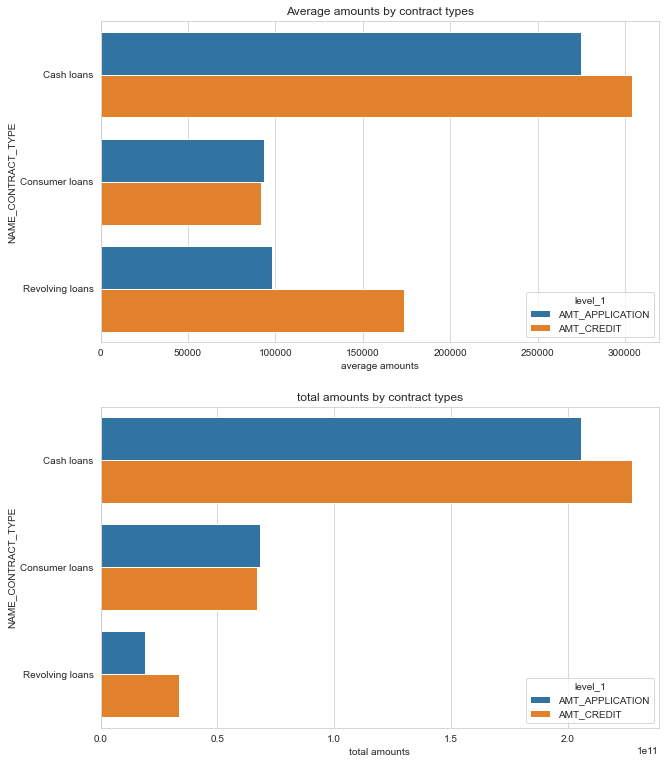

In [213]:
mn = previous_application.groupby("NAME_CONTRACT_TYPE")[["AMT_APPLICATION","AMT_CREDIT"]].mean().stack().reset_index()
tt = previous_application.groupby("NAME_CONTRACT_TYPE")[["AMT_APPLICATION","AMT_CREDIT"]].sum().stack().reset_index()
fig = plt.figure(figsize=(10,13))

plt.subplot(211)
ax = sns.barplot(0,"NAME_CONTRACT_TYPE",data=mn[:6],hue="level_1")

ax.set_xlabel("average amounts")
ax.set_title("Average amounts by contract types")

plt.subplot(212)
ax1 = sns.barplot(0,"NAME_CONTRACT_TYPE",data=tt[:6],hue="level_1")

ax1.set_xlabel("total amounts")
ax1.set_title("total amounts by contract types")
plt.subplots_adjust(hspace = .2)
plt.show()

- Previous application Annuity

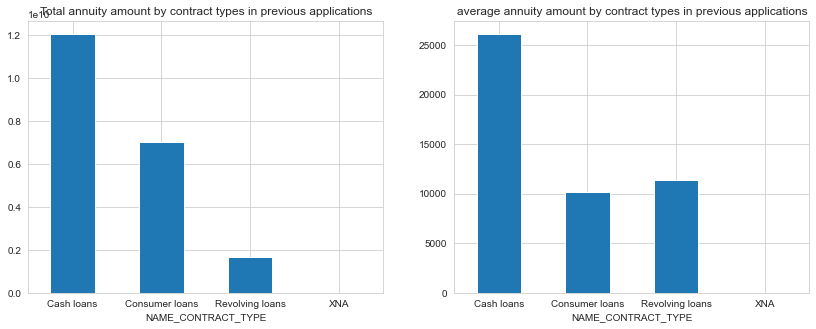

In [146]:
plt.figure(figsize=(14,5))
plt.subplot(121)
previous_application.groupby("NAME_CONTRACT_TYPE")["AMT_ANNUITY"].sum().plot(kind="bar")
plt.xticks(rotation=0)
plt.title("Total annuity amount by contract types in previous applications")
plt.subplot(122)
previous_application.groupby("NAME_CONTRACT_TYPE")["AMT_ANNUITY"].mean().plot(kind="bar")
plt.title("average annuity amount by contract types in previous applications")
plt.xticks(rotation=0)
plt.show()

- Count of application status by application type.

Text(0.5, 1.0, 'Count of application status by application type')

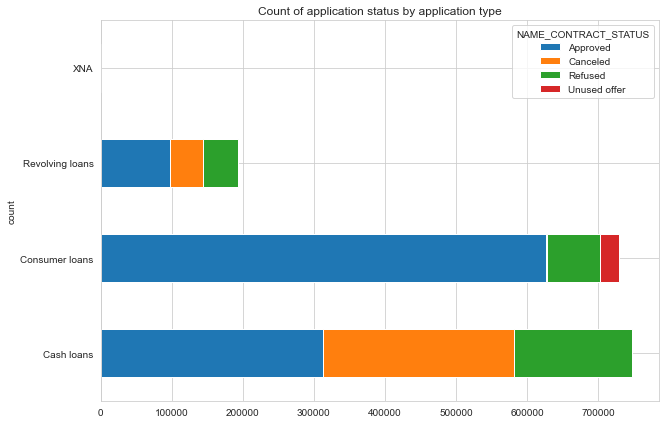

In [214]:
ax = pd.crosstab(previous_application["NAME_CONTRACT_TYPE"],previous_application["NAME_CONTRACT_STATUS"]).plot(kind="barh",figsize=(10,7),stacked=True)
plt.xticks(rotation =0)
plt.ylabel("count")
plt.title("Count of application status by application type")

- Bar plot indicates most approved loan application in Consumer loan category and most rejeted or cancelled are cash loans.

- Contract status by weekdays

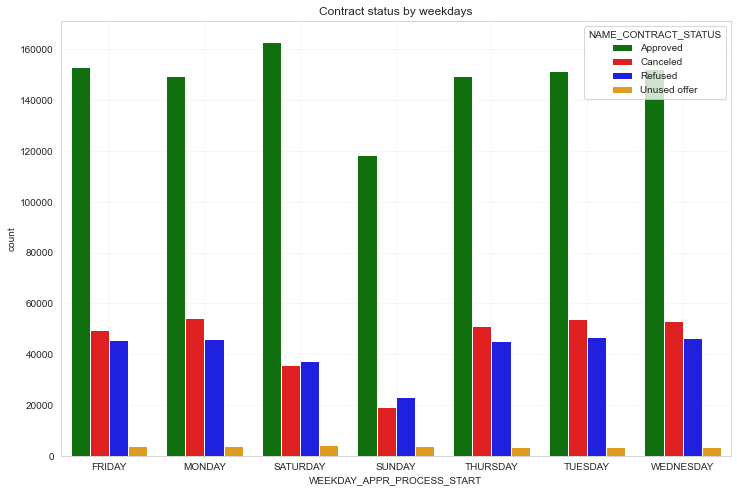

In [217]:
hr = pd.crosstab(previous_application["WEEKDAY_APPR_PROCESS_START"],previous_application["NAME_CONTRACT_STATUS"]).stack().reset_index()
plt.figure(figsize=(12,8))
ax = sns.barplot(hr["WEEKDAY_APPR_PROCESS_START"],hr[0],hue=hr["NAME_CONTRACT_STATUS"],palette=["g","r","b","orange"])

ax.set_ylabel("count")
ax.set_title("Contract status by weekdays")
plt.grid(True,alpha=.2)

- Hour of the day Contract status

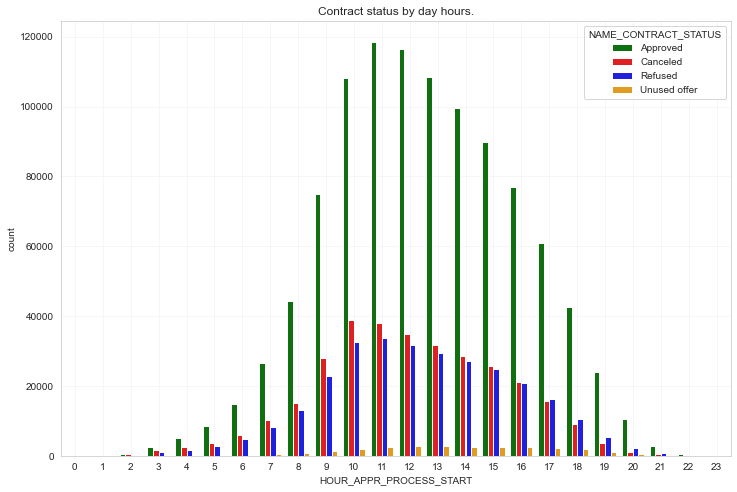

In [218]:
hr = pd.crosstab(previous_application["HOUR_APPR_PROCESS_START"],previous_application["NAME_CONTRACT_STATUS"]).stack().reset_index()
plt.figure(figsize=(12,8))
ax = sns.barplot(hr["HOUR_APPR_PROCESS_START"],hr[0],hue=hr["NAME_CONTRACT_STATUS"],palette=["g","r","b","orange"])
ax.set_ylabel("count")
ax.set_title("Contract status by day hours.")
plt.grid(True,alpha=.2)

- As per bar plot we observed as follows:
    - Max number of loan approval obtained are at 11:00 AM.
    - Max number of loan refused and cancelled are at 10:00 AM.

- Peak hours for week days for applying loans.

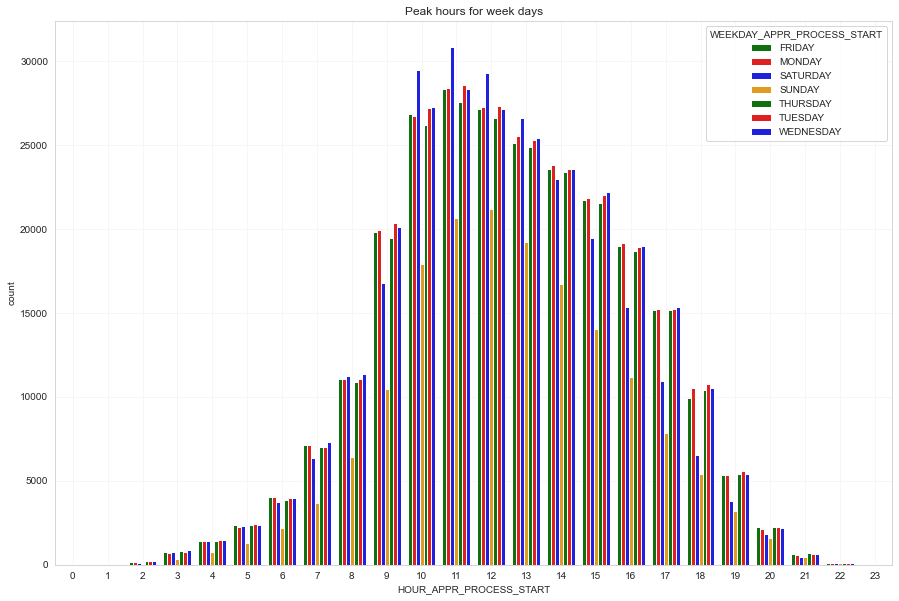

In [220]:
hr = pd.crosstab(previous_application["HOUR_APPR_PROCESS_START"],previous_application["WEEKDAY_APPR_PROCESS_START"]).stack().reset_index()
plt.figure(figsize=(15,10))
ax = sns.barplot(hr["HOUR_APPR_PROCESS_START"],hr[0],hue=hr["WEEKDAY_APPR_PROCESS_START"],palette=["g","r","b","orange"])
ax.set_ylabel("count")
ax.set_title("Peak hours for week days")
plt.grid(True,alpha=.2)

- Percentage of applications accepted, cancelled, refused and unused for different loan purposes.

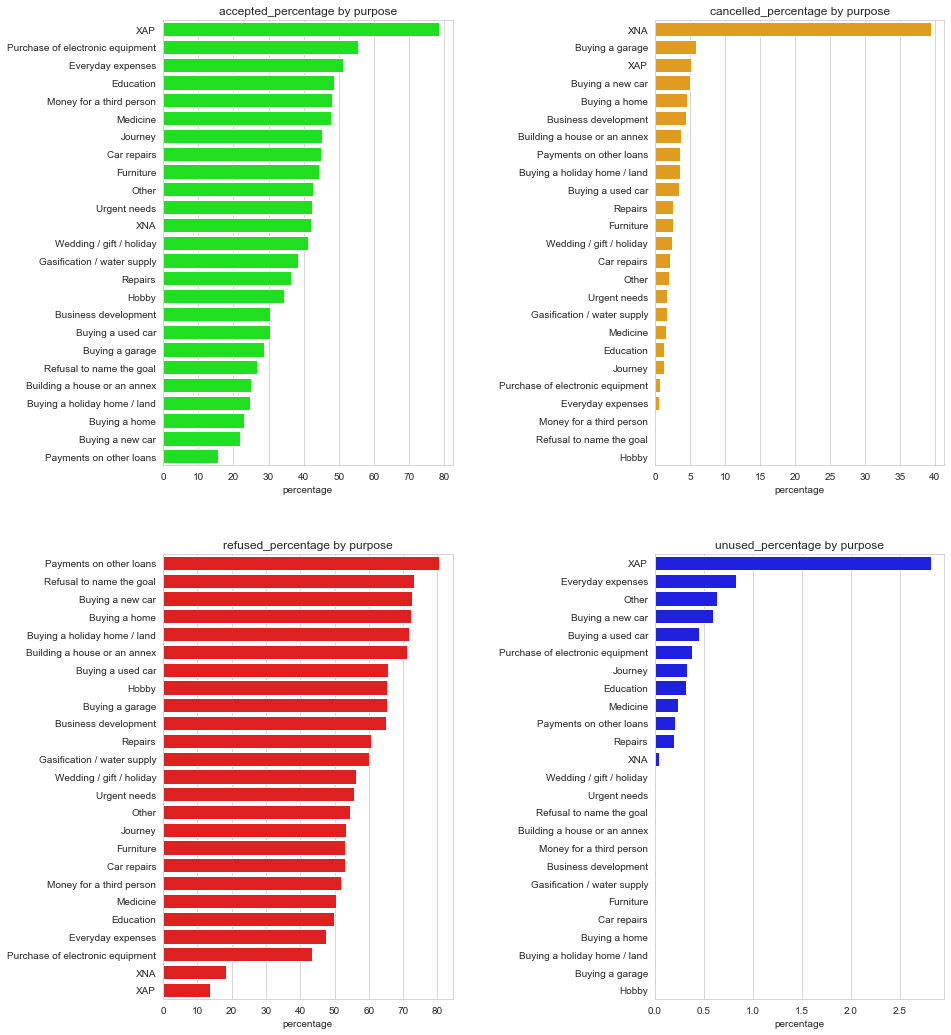

In [222]:
previous_application[["NAME_CASH_LOAN_PURPOSE","NAME_CONTRACT_STATUS"]]
purpose = pd.crosstab(previous_application["NAME_CASH_LOAN_PURPOSE"],previous_application["NAME_CONTRACT_STATUS"])
purpose["a"] = (purpose["Approved"]*100)/(purpose["Approved"]+purpose["Canceled"]+purpose["Refused"]+purpose["Unused offer"])
purpose["c"] = (purpose["Canceled"]*100)/(purpose["Approved"]+purpose["Canceled"]+purpose["Refused"]+purpose["Unused offer"])
purpose["r"] = (purpose["Refused"]*100)/(purpose["Approved"]+purpose["Canceled"]+purpose["Refused"]+purpose["Unused offer"])
purpose["u"] = (purpose["Unused offer"]*100)/(purpose["Approved"]+purpose["Canceled"]+purpose["Refused"]+purpose["Unused offer"])
purpose_new = purpose[["a","c","r","u"]]
purpose_new = purpose_new.stack().reset_index()
purpose_new["NAME_CONTRACT_STATUS"] = purpose_new["NAME_CONTRACT_STATUS"].replace({"a":"accepted_percentage","c":"cancelled_percentage",
                                                               "r":"refused_percentage","u":"unused_percentage"})

lst = purpose_new["NAME_CONTRACT_STATUS"].unique().tolist()
length = len(lst)
cs = ["lime","orange","r","b"]

fig = plt.figure(figsize=(14,18))
for i,j,k in itertools.zip_longest(lst,range(length),cs):
    plt.subplot(2,2,j+1)
    dat = purpose_new[purpose_new["NAME_CONTRACT_STATUS"] == i]
    ax = sns.barplot(0,"NAME_CASH_LOAN_PURPOSE",data=dat.sort_values(by=0,ascending=False),color=k)
    plt.ylabel("")
    plt.xlabel("percentage")
    plt.title(i+" by purpose")
    plt.subplots_adjust(wspace = .7)


- As per Bar plot we found as follows:
    
    - Purposes like XAP, electronic eqipment, everey day expences and education have maximum loan acceptance.

    - Loan puposes like payment of other loans, refusal to name goal, buying new home or car have most refusals.

    - 40% of XNA purpose loans are cancalled.

- Contract status relative to decision made about previous application

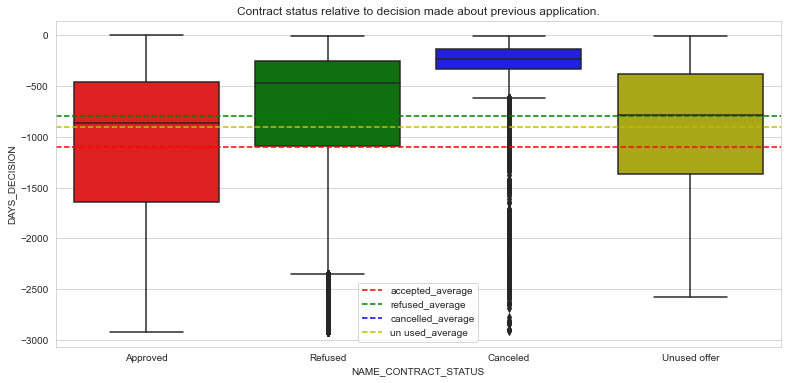

In [223]:
plt.figure(figsize=(13,6))
sns.boxplot(y= previous_application["DAYS_DECISION"],
               x = previous_application["NAME_CONTRACT_STATUS"],palette=["r","g","b","y"])
plt.axhline(previous_application[previous_application["NAME_CONTRACT_STATUS"] == "Approved"]["DAYS_DECISION"].mean(),
            color="r",linestyle="dashed",label="accepted_average")
plt.axhline(previous_application[previous_application["NAME_CONTRACT_STATUS"] == "Refused"]["DAYS_DECISION"].mean(),
            color="g",linestyle="dashed",label="refused_average")
plt.axhline(previous_application[previous_application["NAME_CONTRACT_STATUS"] == "Cancelled"]["DAYS_DECISION"].mean(),color="b",
            linestyle="dashed",label="cancelled_average")
plt.axhline(previous_application[previous_application["NAME_CONTRACT_STATUS"] == "Unused offer"]["DAYS_DECISION"].mean(),color="y",
            linestyle="dashed",label="un used_average")
plt.legend(loc="best")

plt.title("Contract status relative to decision made about previous application.")
plt.show()

- As per bar plot on average approved contract types have higher number of decision days compared to cancelled and refused contracts.

- Client payment methods & reasons for application rejections

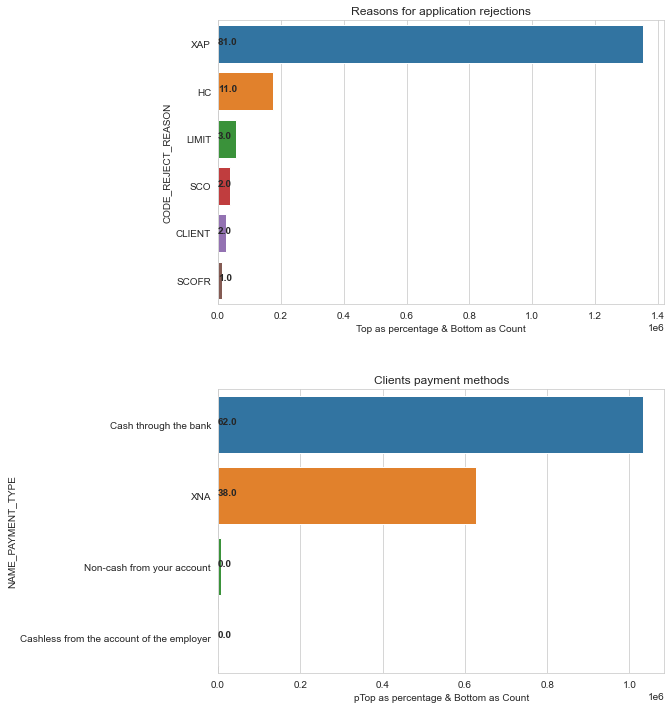

In [224]:
plt.figure(figsize=(8,12))
plt.subplot(211)
rej = previous_application["CODE_REJECT_REASON"].value_counts().reset_index()
ax = sns.barplot("CODE_REJECT_REASON","index",data=rej[:6])
for i,j in enumerate(np.around((rej["CODE_REJECT_REASON"][:6].values*100/(rej["CODE_REJECT_REASON"][:6].sum())))):
    ax.text(.7,i,j,weight="bold")
plt.xlabel("Top as percentage & Bottom as Count")
plt.ylabel("CODE_REJECT_REASON")
plt.title("Reasons for application rejections")

plt.subplot(212)
pay = previous_application["NAME_PAYMENT_TYPE"].value_counts().reset_index()
ax1 = sns.barplot("NAME_PAYMENT_TYPE","index",data=pay)
for i,j in enumerate(np.around((pay["NAME_PAYMENT_TYPE"].values*100/(pay["NAME_PAYMENT_TYPE"].sum())))):
    ax1.text(.7,i,j,weight="bold")
plt.xlabel("pTop as percentage & Bottom as Count")
plt.ylabel("NAME_PAYMENT_TYPE")
plt.title("Clients payment methods")
plt.subplots_adjust(hspace = .3)

- As per bar plot we found as follows :
    - Around 81% of rejected applications the reason is XAP.
    - 62% of choose to pay through cash by bank.

- Distribution in Client suite type & client type.

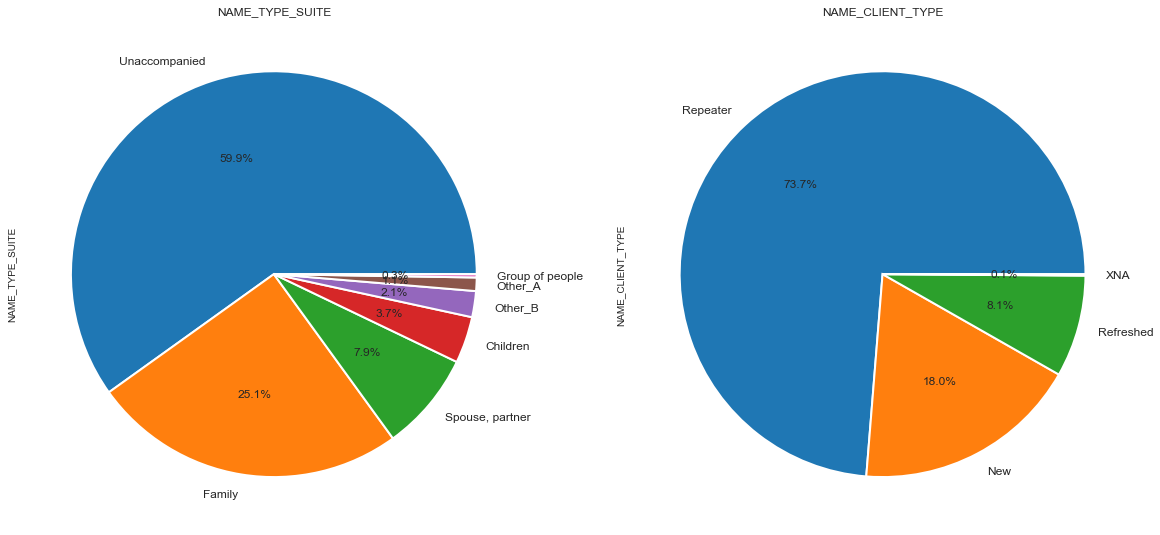

In [225]:
plt.figure(figsize=(20,20))
plt.subplot(121)
previous_application["NAME_TYPE_SUITE"].value_counts().plot.pie(autopct = "%1.1f%%",fontsize=12,
                                              wedgeprops={"linewidth":2,"edgecolor":"white"})
plt.title("NAME_TYPE_SUITE")

plt.subplot(122)
previous_application["NAME_CLIENT_TYPE"].value_counts().plot.pie(autopct = "%1.1f%%",fontsize=12,
                                              wedgeprops={"linewidth":2,"edgecolor":"white"})
plt.title("NAME_CLIENT_TYPE")
plt.show()

- As per Pie plot we found as follow: 
    - 60% clients are un-accompained when applying for loans.
    - 73% clients are old clients.

- Popular goods

Text(0.5, 1.0, 'popular goods for applying loans')

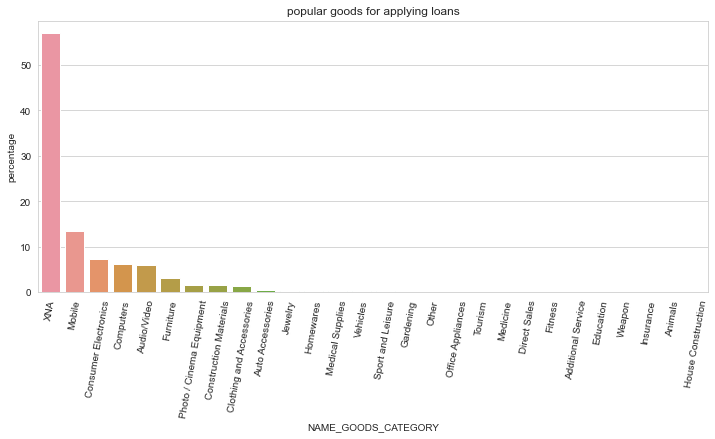

In [226]:
goods = previous_application["NAME_GOODS_CATEGORY"].value_counts().reset_index()
goods["percentage"] = round(goods["NAME_GOODS_CATEGORY"]*100/goods["NAME_GOODS_CATEGORY"].sum(),2)
fig = plt.figure(figsize=(12,5))
ax = sns.barplot("index","percentage",data=goods)
plt.xticks(rotation = 80)
plt.xlabel("NAME_GOODS_CATEGORY")
plt.ylabel("percentage")
plt.title("popular goods for applying loans")

- As per Bar plot XNA, Mobiles, Computers and consumer electronics are popular goods for applying loans.

- Previous applications portfolio and product types

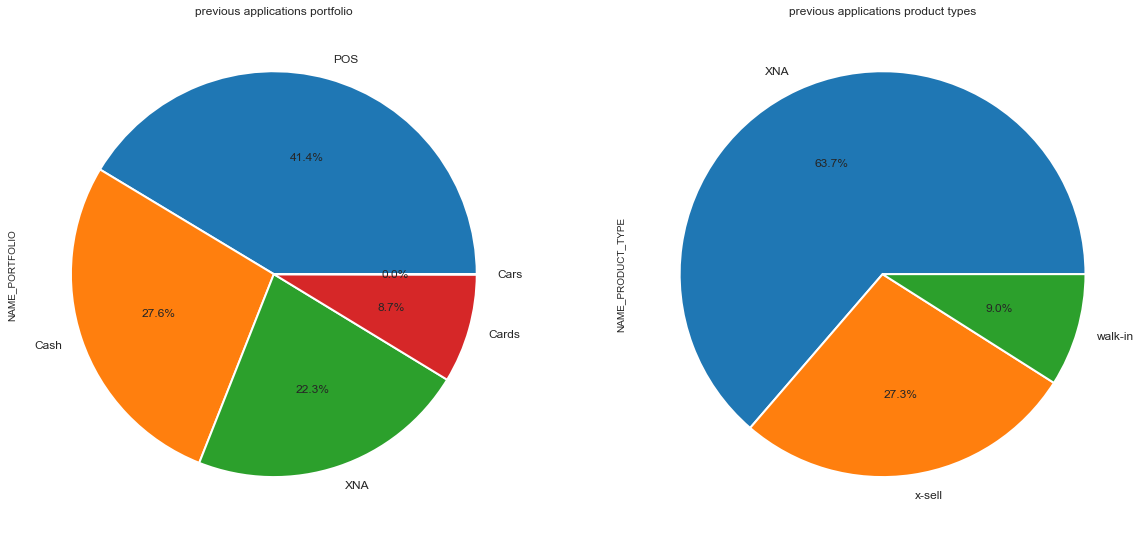

In [227]:
plt.figure(figsize=(20,20))
plt.subplot(121)
previous_application["NAME_PORTFOLIO"].value_counts().plot.pie(autopct = "%1.1f%%",fontsize=12,
                                              wedgeprops={"linewidth":2,"edgecolor":"white"})
plt.title("previous applications portfolio")
plt.subplot(122)
previous_application["NAME_PRODUCT_TYPE"].value_counts().plot.pie(autopct = "%1.1f%%",fontsize=12,
                                              wedgeprops={"linewidth":2,"edgecolor":"white"})                                                             
plt.title("previous applications product types")
plt.show()

- Approval,canceled and refusal rates by channel types.

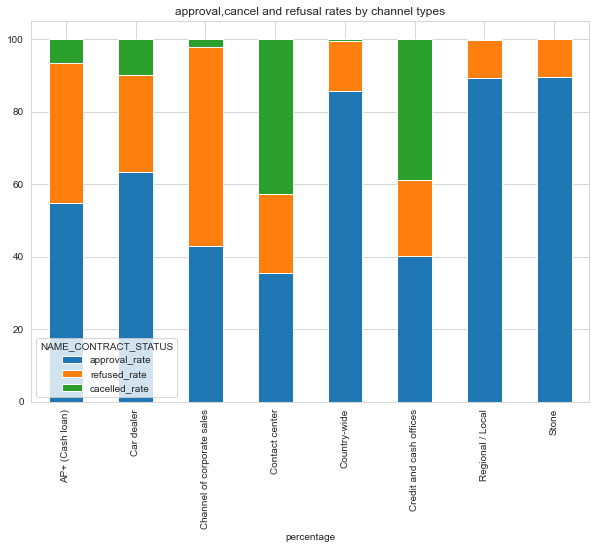

In [231]:
app = pd.crosstab(previous_application["CHANNEL_TYPE"],previous_application["NAME_CONTRACT_STATUS"])
app1 = app
app1["approval_rate"] = app1["Approved"]*100/(app1["Approved"]+app1["Refused"]+app1["Canceled"])
app1["refused_rate"]  = app1["Refused"]*100/(app1["Approved"]+app1["Refused"]+app1["Canceled"])
app1["cacelled_rate"] = app1["Canceled"]*100/(app1["Approved"]+app1["Refused"]+app1["Canceled"])
app2 = app[["approval_rate","refused_rate","cacelled_rate"]]
ax = app2.plot(kind="bar",stacked=True,figsize=(10,7))
ax.set_xlabel("percentage")
ax.set_title("approval,cancel and refusal rates by channel types")
plt.show()

- As per bar plot we found as follow:
    - Channel types like Stone, regional and country-wide have maximum approval rates.
    - Channel of coorporate sales have maximum refusal rate.
    - Credit-cash centres and Contact centres have maximum cancellation rates.

In [ ]:
Highest amount credited seller areas and industries.
SELLERPLACE_AREA - Selling area of seller place of the previous application.

NAME_SELLER_INDUSTRY - The industry of the seller.

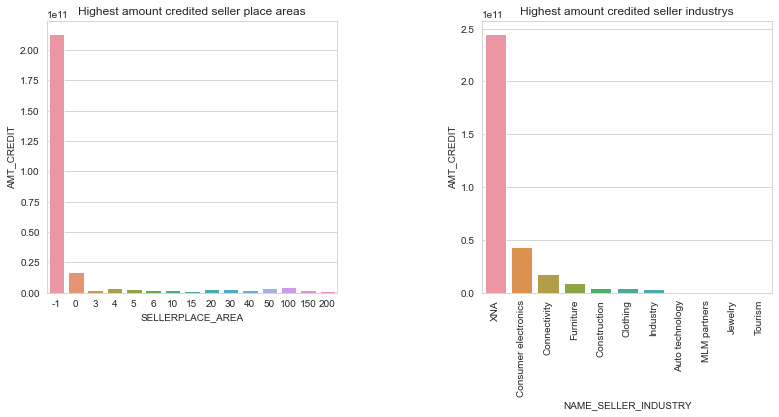

In [232]:
fig = plt.figure(figsize=(13,5))
plt.subplot(121)
are = previous_application.groupby("SELLERPLACE_AREA")["AMT_CREDIT"].sum().reset_index()
are = are.sort_values(by ="AMT_CREDIT",ascending = False)
ax = sns.barplot(y= "AMT_CREDIT",x ="SELLERPLACE_AREA",data=are[:15])
ax.set_title("Highest amount credited seller place areas")

plt.subplot(122)
sell = previous_application.groupby("NAME_SELLER_INDUSTRY")["AMT_CREDIT"].sum().reset_index().sort_values(by = "AMT_CREDIT",ascending = False)
ax1=sns.barplot(y = "AMT_CREDIT",x = "NAME_SELLER_INDUSTRY",data=sell)

ax1.set_title("Highest amount credited seller industrys")
plt.xticks(rotation=90)
plt.subplots_adjust(wspace = .5)

- Popular terms of previous credit at application.

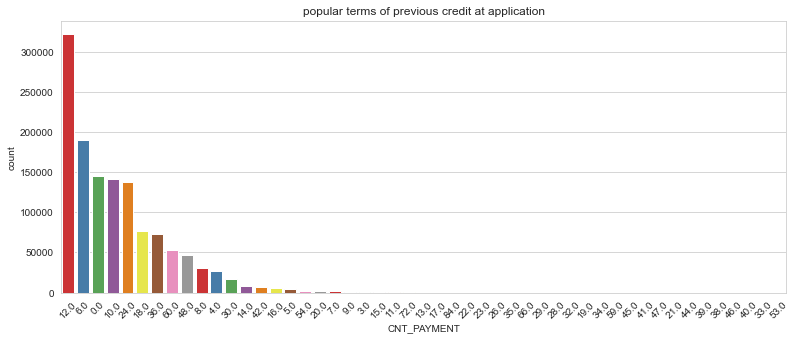

In [233]:
plt.figure(figsize=(13,5))
ax = sns.countplot(previous_application["CNT_PAYMENT"],palette="Set1",order=previous_application["CNT_PAYMENT"].value_counts().index)
plt.xticks(rotation = 45)
plt.title("popular terms of previous credit at application")
plt.show()

- As per bat plot Popular term of previous credit are 6 months, 10 months, 1 year, 2 years and 3 years.

- Detailed product combination of the previous application

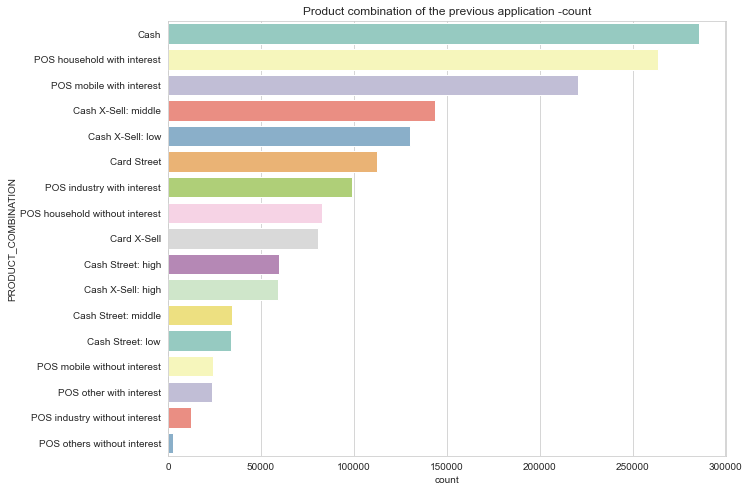

In [239]:
plt.figure(figsize=(10,8))

sns.countplot(y = previous_application["PRODUCT_COMBINATION"],order=previous_application["PRODUCT_COMBINATION"].value_counts().index, palette="Set3")
plt.title("Product combination of the previous application -count")
plt.show()

- Frequency distribution of interest rates and client insurance requests

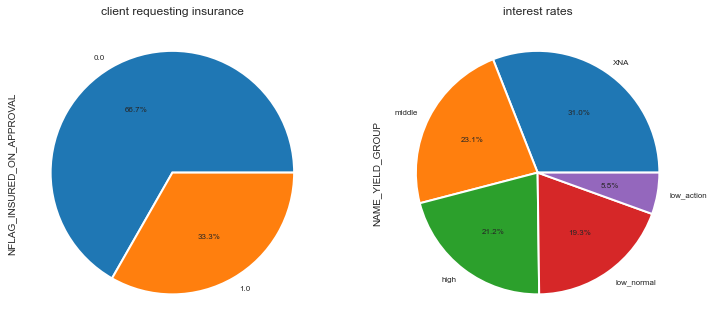

In [240]:
plt.figure(figsize=(12,6))
plt.subplot(121)
previous_application["NFLAG_INSURED_ON_APPROVAL"].value_counts().plot.pie(autopct = "%1.1f%%",fontsize=8,
                                              wedgeprops={"linewidth":2,"edgecolor":"white"})
plt.title("client requesting insurance")

plt.subplot(122)
previous_application["NAME_YIELD_GROUP"].value_counts().plot.pie(autopct = "%1.1f%%",fontsize=8,
                                              wedgeprops={"linewidth":2,"edgecolor":"white"})
plt.title("interest rates")
plt.show()

- Relative to application date of current application (Days variables)

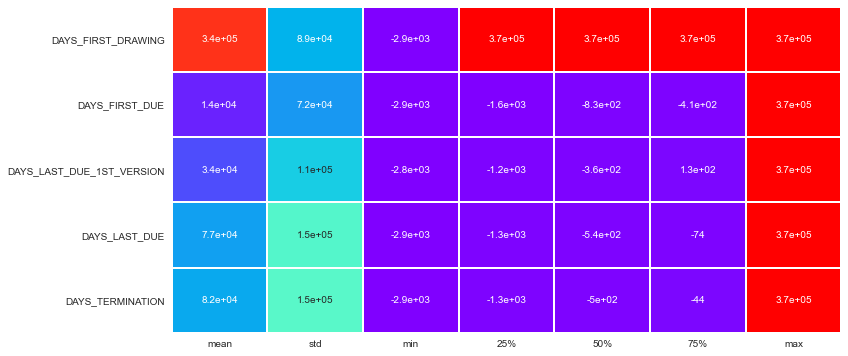

In [248]:
cols = ['DAYS_FIRST_DRAWING', 'DAYS_FIRST_DUE', 'DAYS_LAST_DUE_1ST_VERSION','DAYS_LAST_DUE', 'DAYS_TERMINATION']
plt.figure(figsize=(12,6))
sns.heatmap(previous_application[cols].describe()[1:].transpose(),
            annot=True,linewidth=1,cmap ="rainbow",cbar = False)
plt.show()

- Corelation between variables

In [ ]:
Application Data

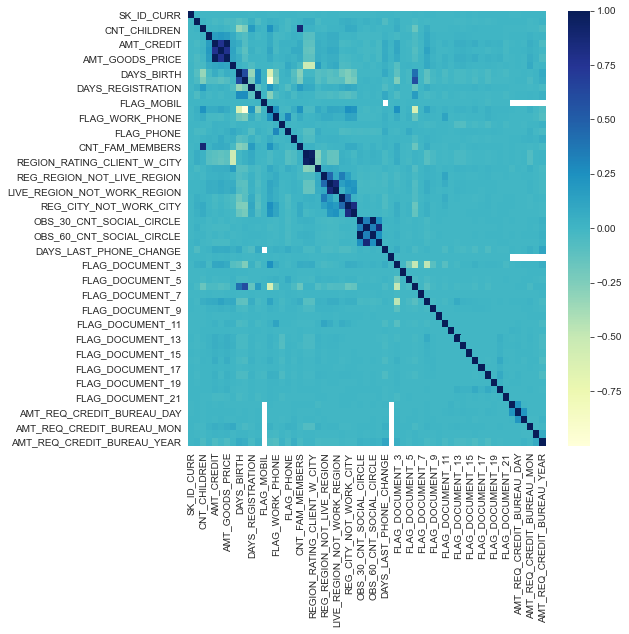

In [249]:
corrmat = application_data.corr() 
  
f, ax = plt.subplots(figsize =(8, 8)) 
sns.heatmap(corrmat, ax = ax, cmap ="YlGnBu") 
plt.show()

- Previous Application

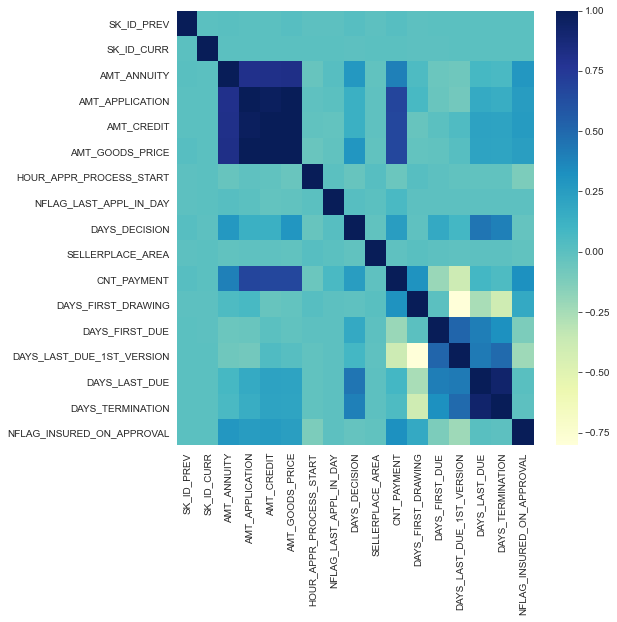

In [252]:
corrmat = previous_application.corr() 
  
f, ax = plt.subplots(figsize =(8, 8)) 
sns.heatmap(corrmat, ax = ax, cmap ="YlGnBu") 
plt.show()

In [253]:
corrmat = previous_application.corr() 
corrdf = corrmat.where(np.triu(np.ones(corrmat.shape), k=1).astype(np.bool))
corrdf = corrdf.unstack().reset_index()
corrdf.columns = ['Var1', 'Var2', 'Correlation']
corrdf.dropna(subset = ['Correlation'], inplace = True)
corrdf['Correlation'] = round(corrdf['Correlation'], 2)
corrdf['Correlation'] = abs(corrdf['Correlation'])
corrdf.sort_values(by = 'Correlation', ascending = False).head(10)

,Var1,Var2,Correlation
88,AMT_GOODS_PRICE,AMT_APPLICATION,1.00
89,AMT_GOODS_PRICE,AMT_CREDIT,0.99
71,AMT_CREDIT,AMT_APPLICATION,0.98
269,DAYS_TERMINATION,DAYS_LAST_DUE,0.93
87,AMT_GOODS_PRICE,AMT_ANNUITY,0.82
70,AMT_CREDIT,AMT_ANNUITY,0.82
53,AMT_APPLICATION,AMT_ANNUITY,0.81
232,DAYS_LAST_DUE_1ST_VERSION,DAYS_FIRST_DRAWING,0.80
173,CNT_PAYMENT,AMT_APPLICATION,0.68
174,CNT_PAYMENT,AMT_CREDIT,0.67


- Application Data

- Top 10 Correlation Fields for Repayer

In [254]:
df_repayer = application_data[application_data['TARGET'] == 0]
df_defaulter = application_data[application_data['TARGET'] == 1]

In [255]:
corrmat = df_repayer.corr() 
corrdf = corrmat.where(np.triu(np.ones(corrmat.shape), k=1).astype(np.bool))
corrdf = corrdf.unstack().reset_index()
corrdf.columns = ['Var1', 'Var2', 'Correlation']
corrdf.dropna(subset = ['Correlation'], inplace = True)
corrdf['Correlation'] = round(corrdf['Correlation'], 2)
corrdf['Correlation'] = abs(corrdf['Correlation'])
corrdf.sort_values(by = 'Correlation', ascending = False).head(10)

,Var1,Var2,Correlation
776,FLAG_EMP_PHONE,DAYS_EMPLOYED,1.00
1798,OBS_60_CNT_SOCIAL_CIRCLE,OBS_30_CNT_SOCIAL_CIRCLE,1.00
358,AMT_GOODS_PRICE,AMT_CREDIT,0.99
1199,REGION_RATING_CLIENT_W_CITY,REGION_RATING_CLIENT,0.95
1064,CNT_FAM_MEMBERS,CNT_CHILDREN,0.88
1858,DEF_60_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,0.86
1439,LIVE_REGION_NOT_WORK_REGION,REG_REGION_NOT_WORK_REGION,0.86
1619,LIVE_CITY_NOT_WORK_CITY,REG_CITY_NOT_WORK_CITY,0.83
359,AMT_GOODS_PRICE,AMT_ANNUITY,0.78
299,AMT_ANNUITY,AMT_CREDIT,0.77


- Top 10 Correlation Fields for Defaulter

In [168]:
corrmat = df_defaulter.corr() 
corrdf = corrmat.where(np.triu(np.ones(corrmat.shape), k=1).astype(np.bool))
corrdf = corrdf.unstack().reset_index()
corrdf.columns = ['Var1', 'Var2', 'Correlation']
corrdf.dropna(subset = ['Correlation'], inplace = True)
corrdf['Correlation'] = round(corrdf['Correlation'], 2)
corrdf['Correlation'] = abs(corrdf['Correlation'])
corrdf.sort_values(by = 'Correlation', ascending = False).head(10)

,Var1,Var2,Correlation
1798,OBS_60_CNT_SOCIAL_CIRCLE,OBS_30_CNT_SOCIAL_CIRCLE,1.00
776,FLAG_EMP_PHONE,DAYS_EMPLOYED,1.00
358,AMT_GOODS_PRICE,AMT_CREDIT,0.98
1199,REGION_RATING_CLIENT_W_CITY,REGION_RATING_CLIENT,0.96
1064,CNT_FAM_MEMBERS,CNT_CHILDREN,0.89
1858,DEF_60_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,0.87
1439,LIVE_REGION_NOT_WORK_REGION,REG_REGION_NOT_WORK_REGION,0.85
1619,LIVE_CITY_NOT_WORK_CITY,REG_CITY_NOT_WORK_CITY,0.78
299,AMT_ANNUITY,AMT_CREDIT,0.75
359,AMT_GOODS_PRICE,AMT_ANNUITY,0.75


In [256]:
mergeddf =  pd.merge(application_data,previous_application,on='SK_ID_CURR')
mergeddf.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE_x,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_x,AMT_ANNUITY_x,AMT_GOODS_PRICE_x,NAME_TYPE_SUITE_x,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START_x,HOUR_APPR_PROCESS_START_x,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,SK_ID_PREV,NAME_CONTRACT_TYPE_y,AMT_ANNUITY_y,AMT_APPLICATION,AMT_CREDIT_y,AMT_GOODS_PRICE_y,WEEKDAY_APPR_PROCESS_START_y,HOUR_APPR_PROCESS_START_y,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE_y,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,9461,-637,-3648.0,2120,1,1,0,1,1,0,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,2.0,2.0,2.0,2.0,1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,1038818,Consumer loans,9251.775,179055.0,179055.0,179055.0,SATURDAY,9,Y,1,XAP,Approved,-606,XNA,XAP,NaN,New,Vehicles,POS,XNA,Stone,500,Auto technology,24.0,low_normal,POS other with interest,365243.0,-565.0,125.0,-25.0,-17.0,0.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,16765,-1188,-1186.0,291,1,1,0,1,1,0,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,1.0,0.0,1.0,0.0,828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,1810518,Cash loans,98356.995,900000.0,1035882.0,900000.0,FRIDAY,12,Y,1,XNA,Approved,-746,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,low_normal,Cash X-Sell: low,365243.0,-716.0,-386.0,-536.0,-527.0,1.0
2,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,16765,-1188,-1186.0,291,1,1,0,1,1,0,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,1.0,0.0,1.0,0.0,828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,2636178,Consumer loans,64567.665,337500.0,348637.5,337500.0,SUNDAY,17,Y,1,XAP,Approved,-828,Cash through the bank,XAP,Family,Refreshed,Furniture,POS,XNA,Stone,1400,Furniture,6.0,middle,POS industry with interest,365243.0,-797.0,-647.0,-647.0,-639.0,0.0
3,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,16765,-1188,-1186.0,291,1,1,0,1,1,0,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,1.0,0.0,1.0,0.0,828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,2396755,Consumer loans,6737.310,68809.5,68053.5,68809.5,SATURDAY,15,Y,1,XAP,Approved,-2341,Cash through the bank,XAP,Fa

In [257]:
y = mergeddf.groupby('SK_ID_CURR').size()
dfA = mergeddf.groupby('SK_ID_CURR').agg({'TARGET': np.sum})
dfA['count'] = y
display(dfA.head(10))

,TARGET,count
SK_ID_CURR,,
100002,1,1
100003,0,3
100004,0,1
100006,0,9
100007,0,6
100008,0,5
100009,0,7
100010,0,1
100011,0,4


In [258]:
dfA.sort_values(by = 'count',ascending=False).head(10)

,TARGET,count
SK_ID_CURR,,
265681,0,73
173680,0,72
242412,0,68
206783,0,67
389950,0,64
382179,0,64
198355,0,63
345161,0,62
446486,0,62


In [259]:
df_repayer = dfA[dfA['TARGET'] == 0]
df_defaulter = dfA[dfA['TARGET'] == 1]

- Repayers' Borrowing History

In [260]:
df_repayer.sort_values(by = 'count',ascending=False).head(10)

,TARGET,count
SK_ID_CURR,,
265681,0,73
173680,0,72
242412,0,68
206783,0,67
382179,0,64
389950,0,64
198355,0,63
446486,0,62
345161,0,62


- Defaulters' Borrowing History

In [261]:
df_defaulter.sort_values(by = 'count',ascending=False).head(10)

,TARGET,count
SK_ID_CURR,,
100002,1,1
333349,1,1
333587,1,1
333582,1,1
333534,1,1
333506,1,1
333419,1,1
333355,1,1
333337,1,1
